#### Problem Statement :
- Explore Dry Beans Classification using models which will help us to recognize the type of beans.

#### What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634927.00,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670033.00,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629727.00,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635681.00,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631934.00,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [5]:
data = data.drop(2, axis = 0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13610 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13610 non-null  int64  
 1   Perimeter        13610 non-null  float64
 2   MajorAxisLength  13610 non-null  float64
 3   MinorAxisLength  13610 non-null  float64
 4   AspectRation     13610 non-null  float64
 5   Eccentricity     13610 non-null  float64
 6   ConvexArea       13610 non-null  int64  
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13610 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13610 non-null  float64
 11  Compactness      13610 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13610 non-null  float64
 16  Class            13610 non-null  object 
dtypes: float64(1

In [7]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [8]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
data.duplicated().sum()

68

In [10]:
data.drop_duplicates(inplace = True)

<AxesSubplot:xlabel='Class', ylabel='Area'>

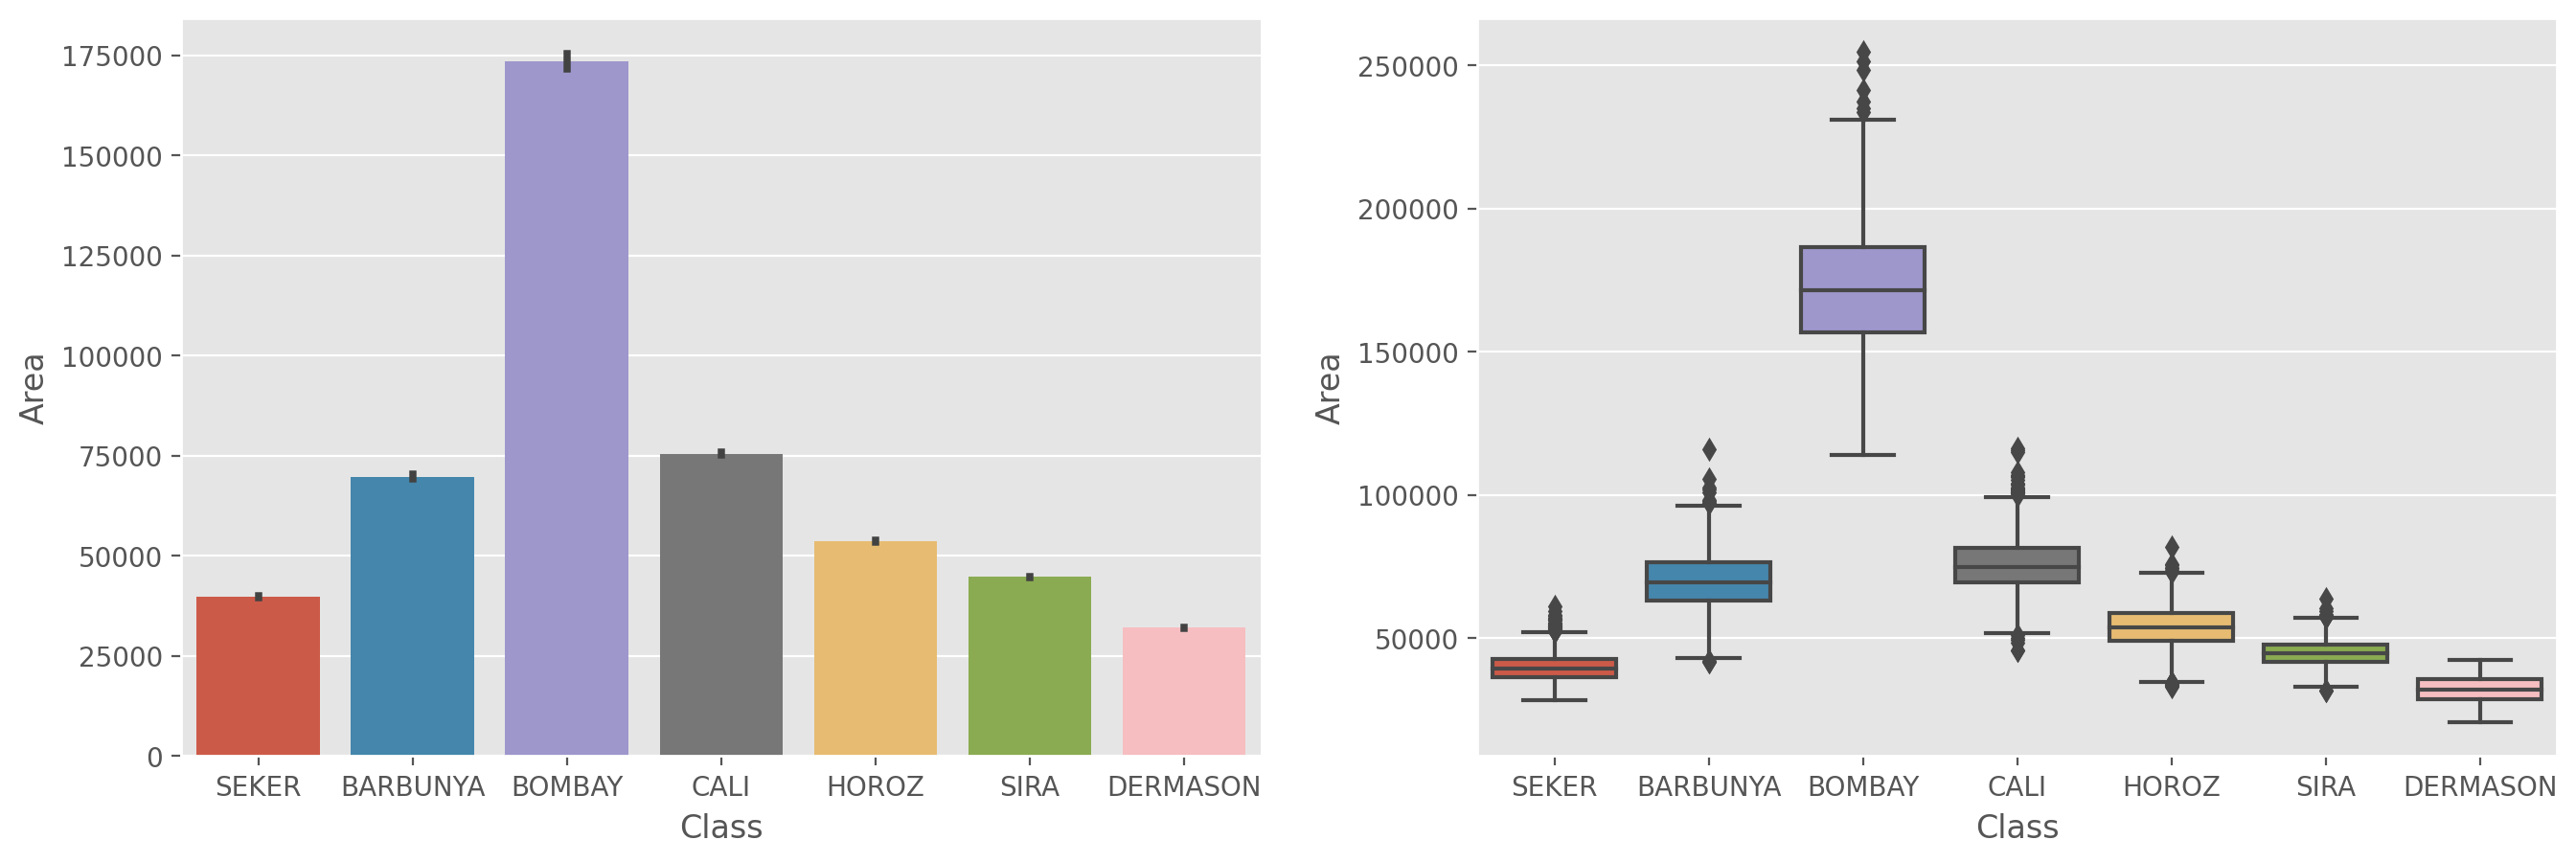

In [11]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Area', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Area', data = data)

<AxesSubplot:xlabel='Class', ylabel='Perimeter'>

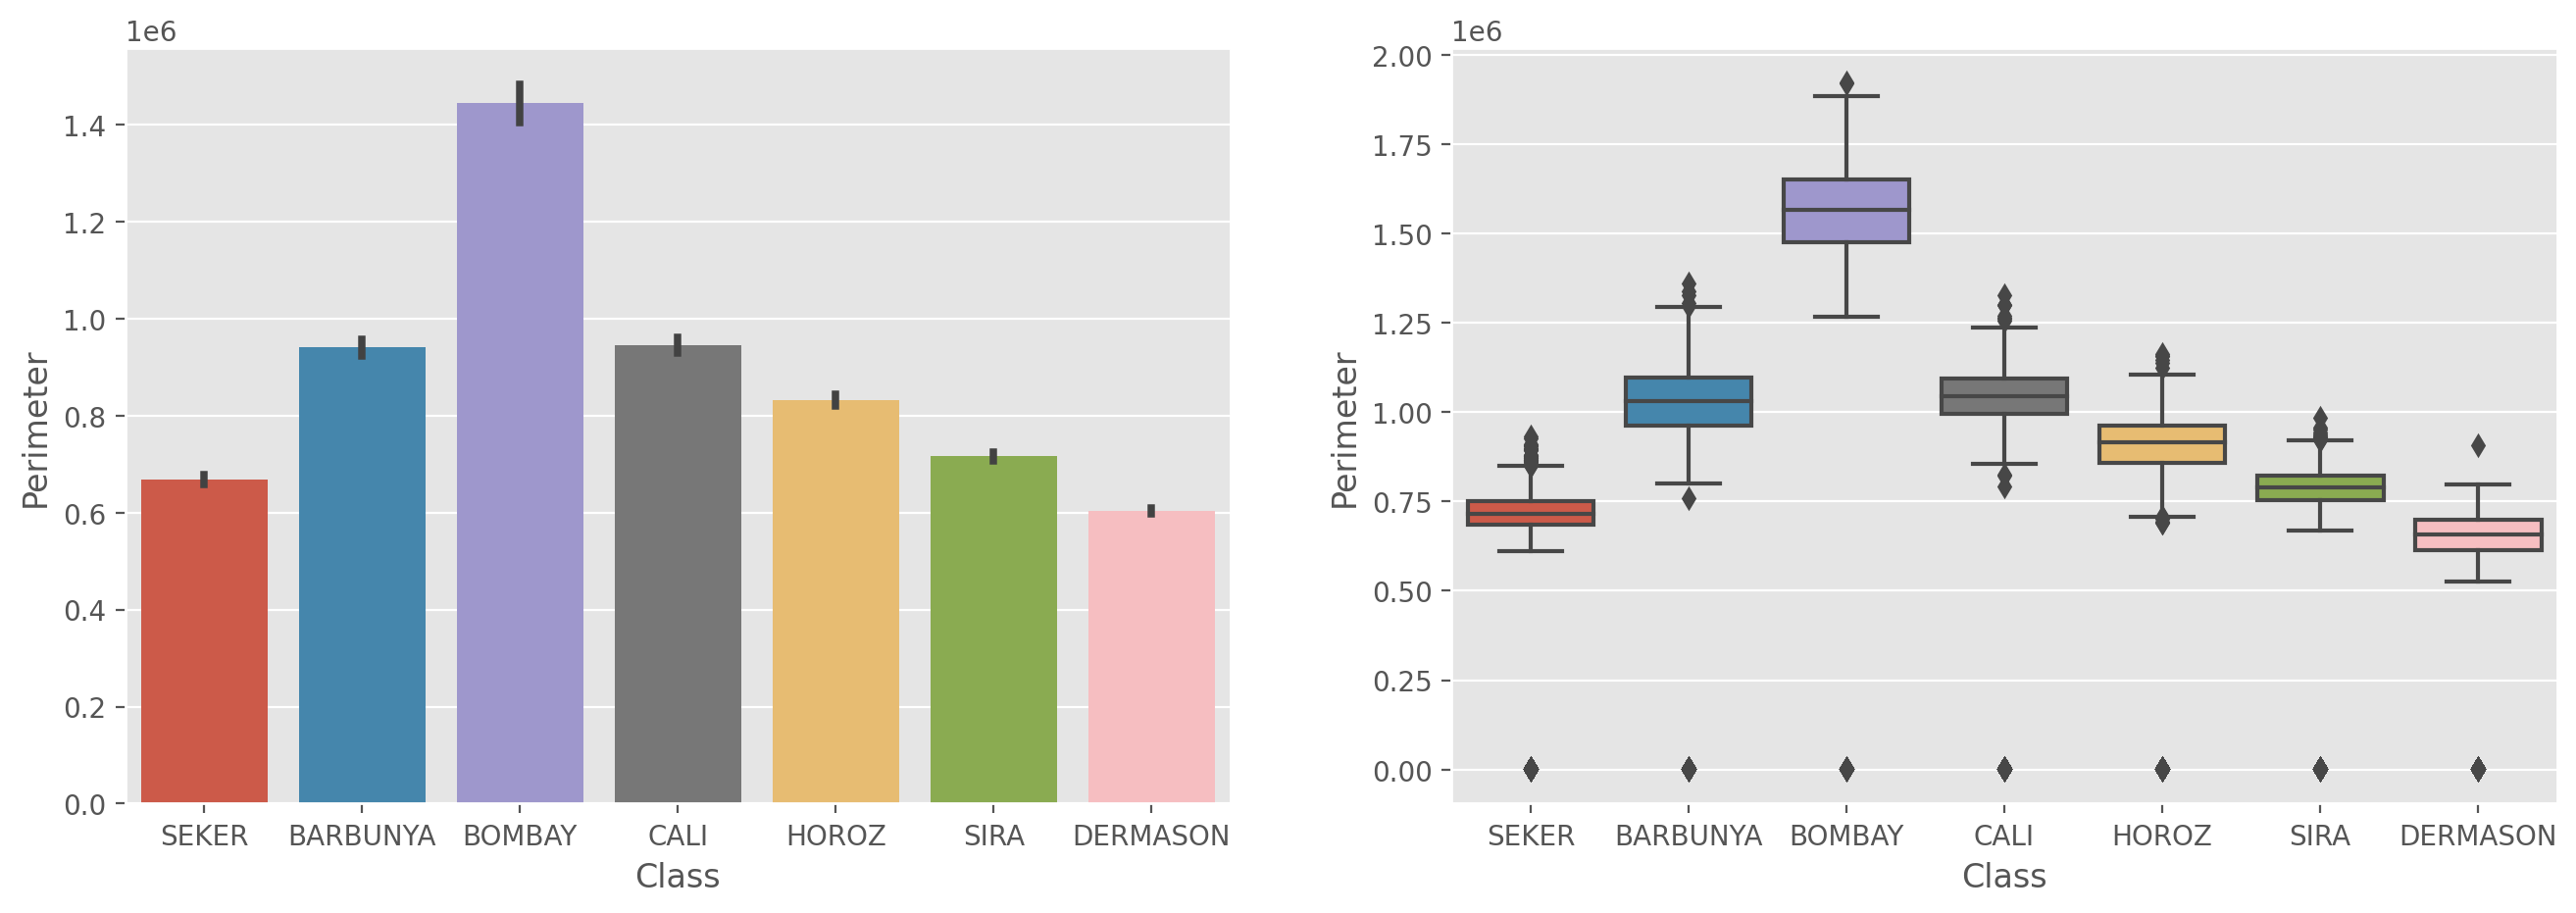

In [12]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Perimeter', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Perimeter', data = data)

<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

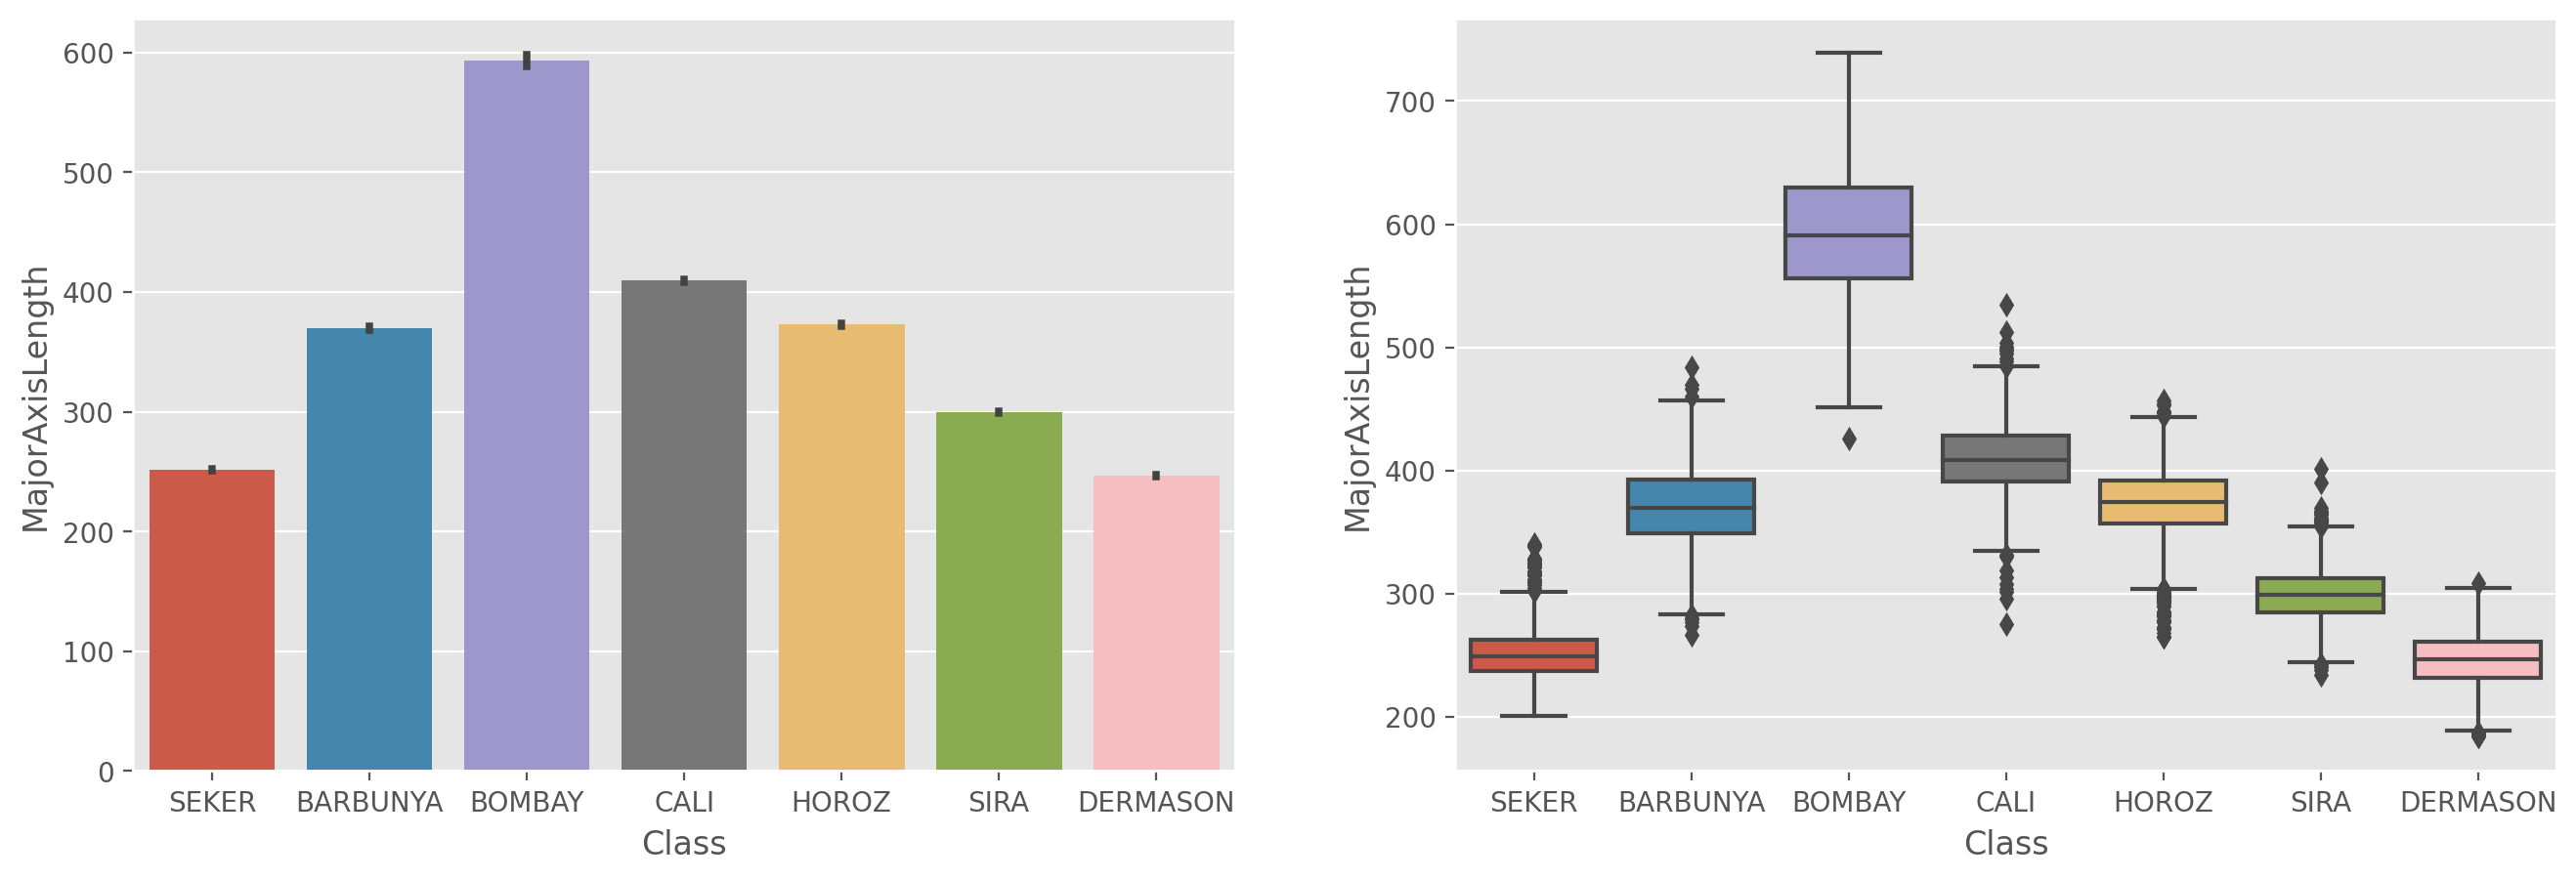

In [13]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'MajorAxisLength', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'MajorAxisLength', data = data)

<AxesSubplot:xlabel='Class', ylabel='MinorAxisLength'>

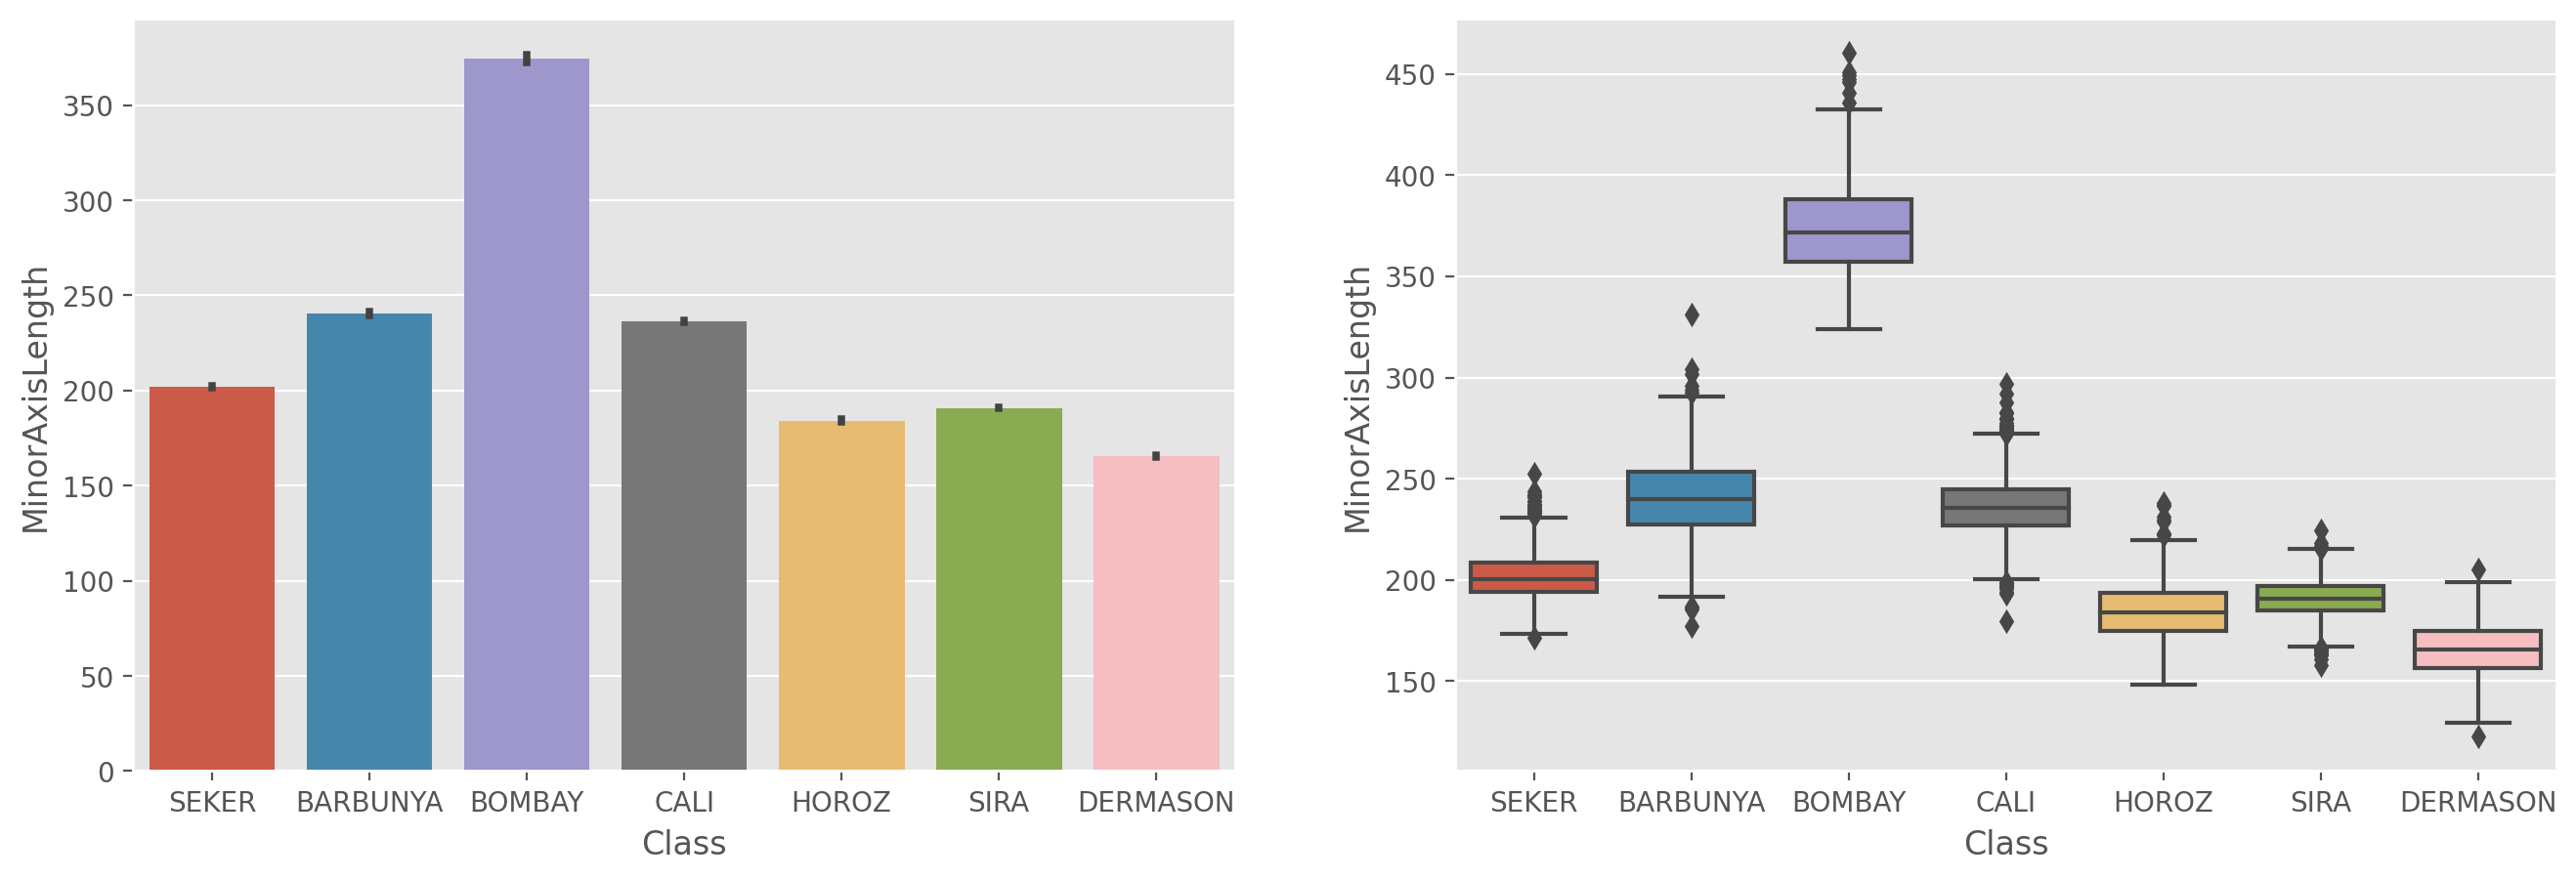

In [14]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'MinorAxisLength', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'MinorAxisLength', data = data)

<AxesSubplot:xlabel='Class', ylabel='AspectRation'>

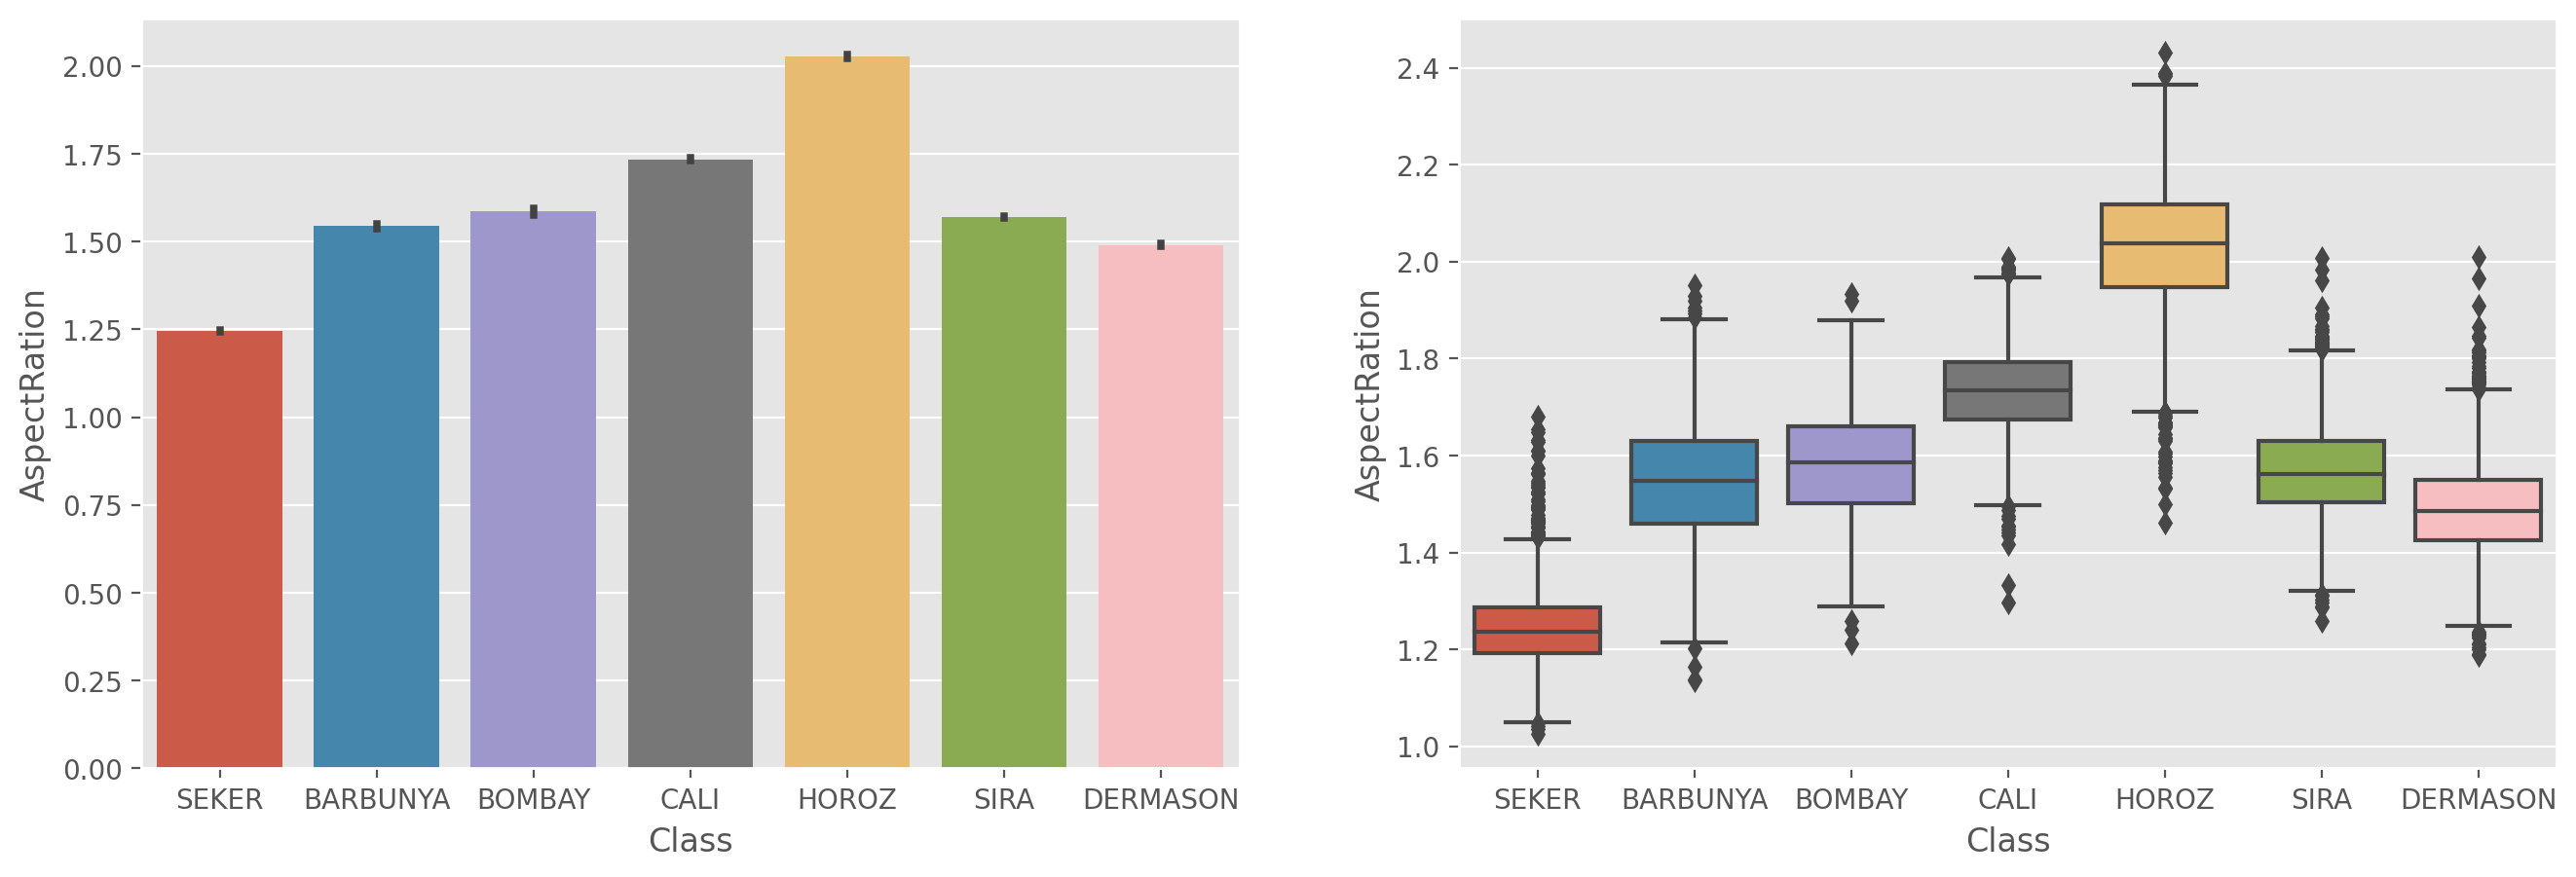

In [15]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'AspectRation', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'AspectRation', data = data)

<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

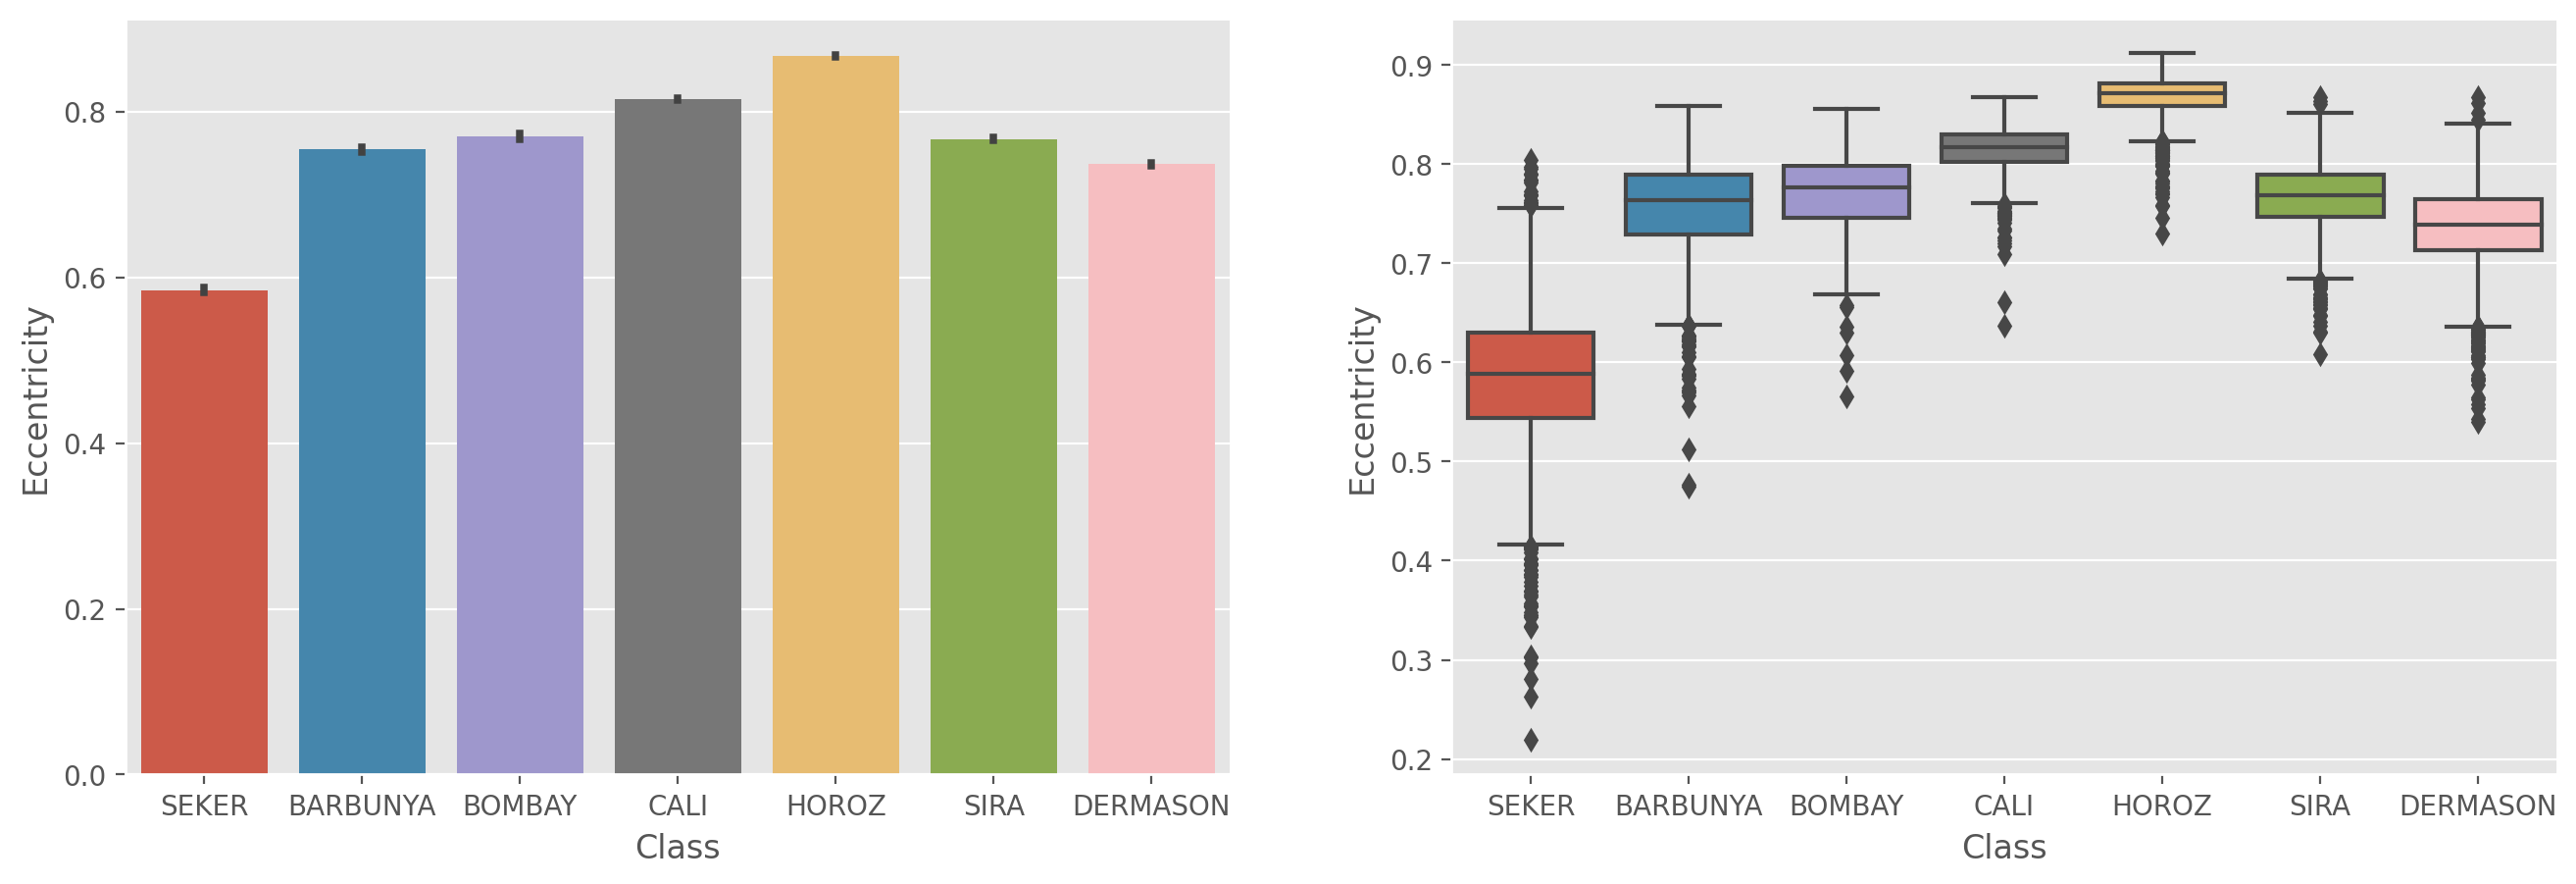

In [16]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Eccentricity', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Eccentricity', data = data)

<AxesSubplot:xlabel='Class', ylabel='ConvexArea'>

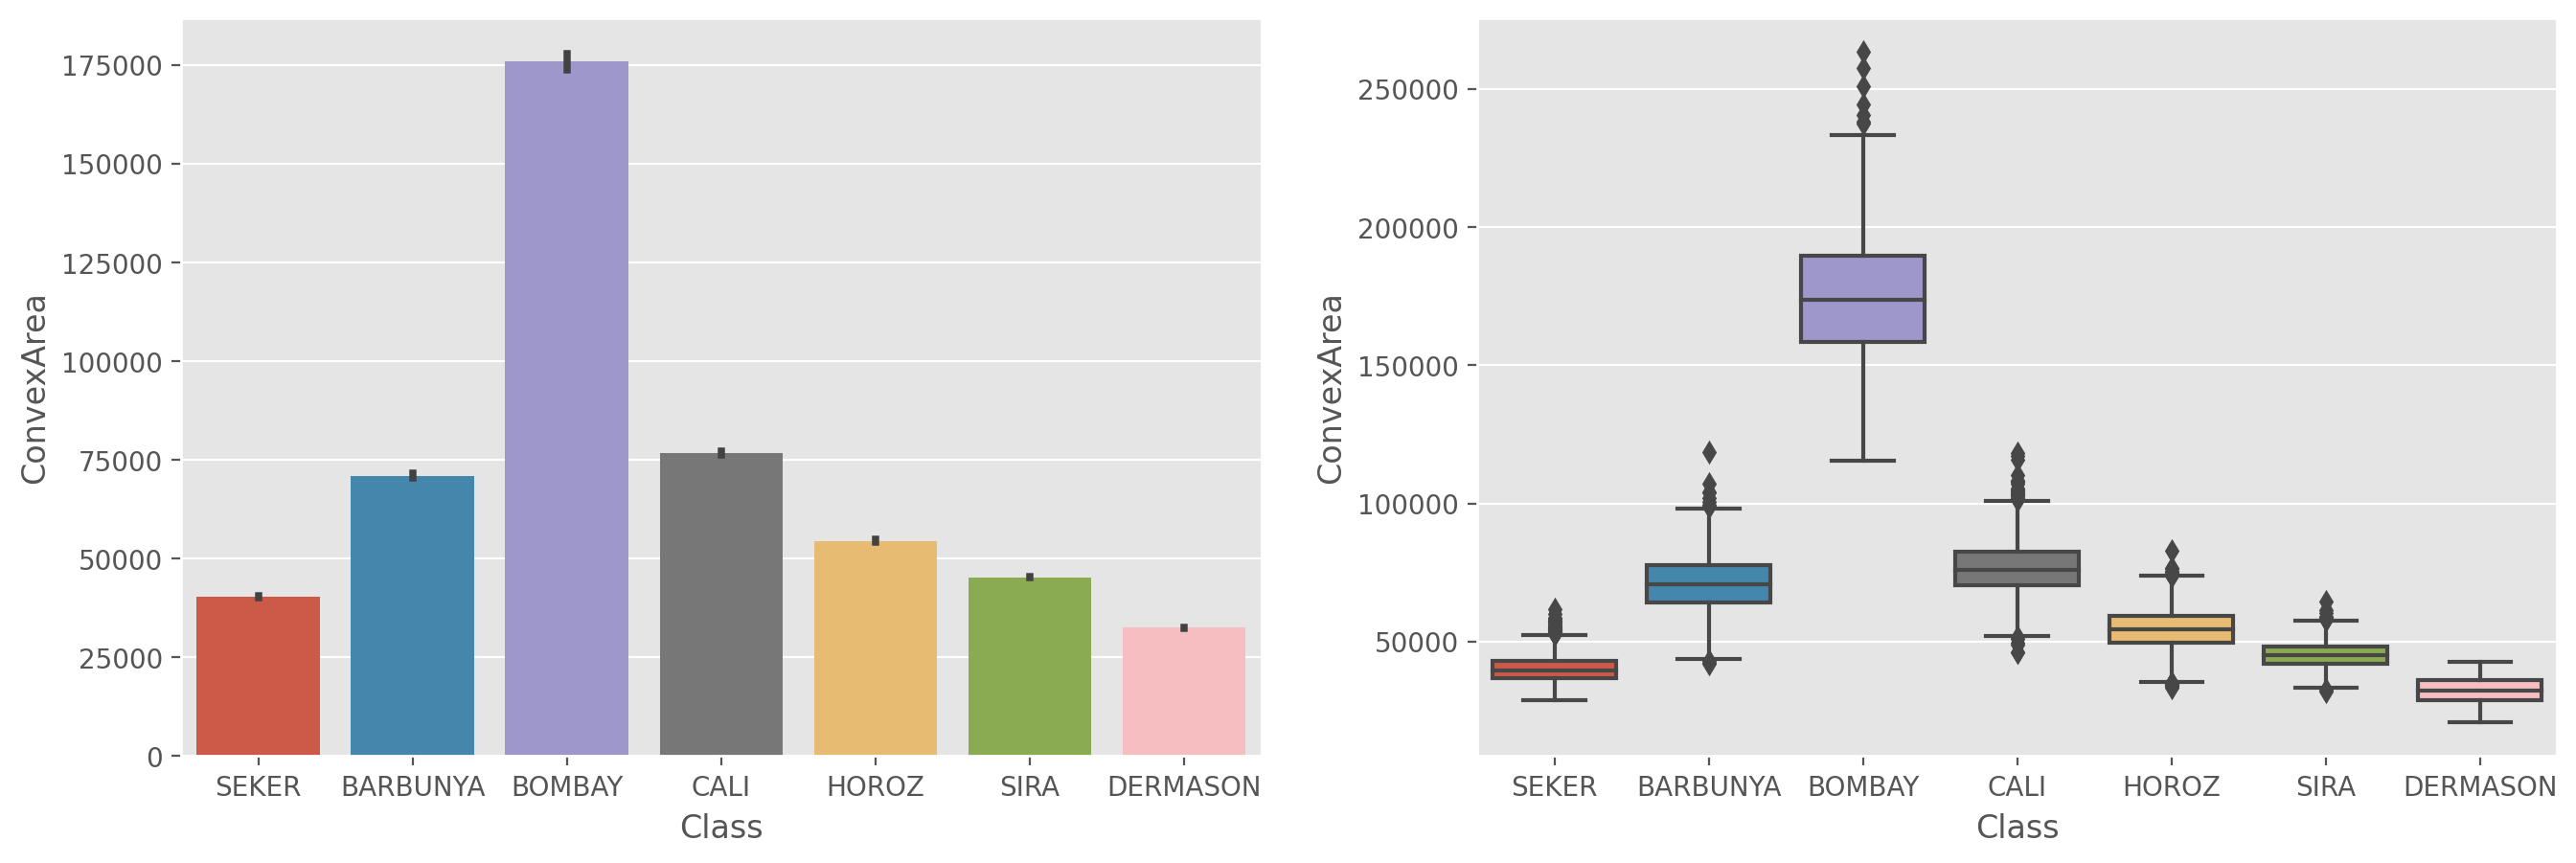

In [17]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'ConvexArea', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'ConvexArea', data = data)

<AxesSubplot:xlabel='Class', ylabel='EquivDiameter'>

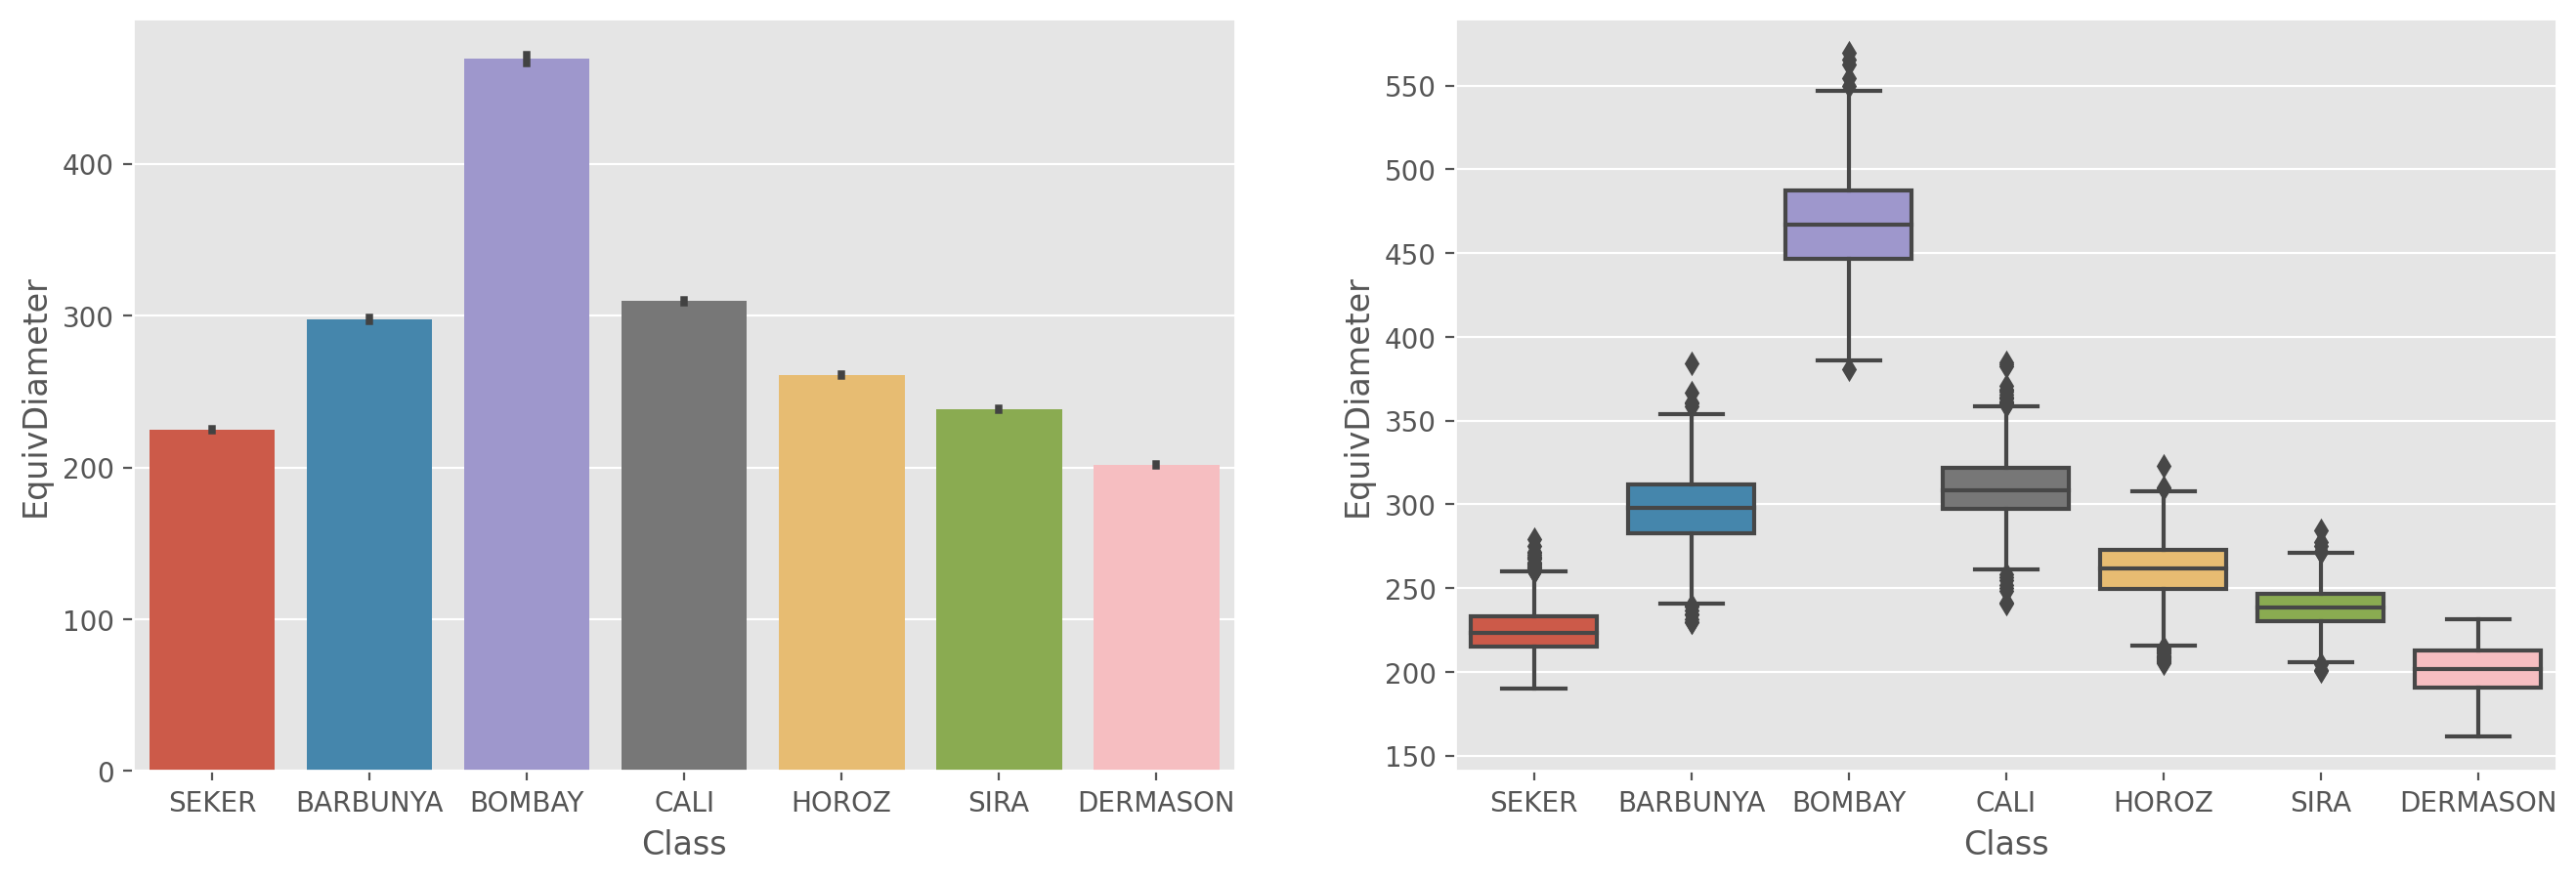

In [18]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'EquivDiameter', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'EquivDiameter', data = data)

<AxesSubplot:xlabel='Class', ylabel='Extent'>

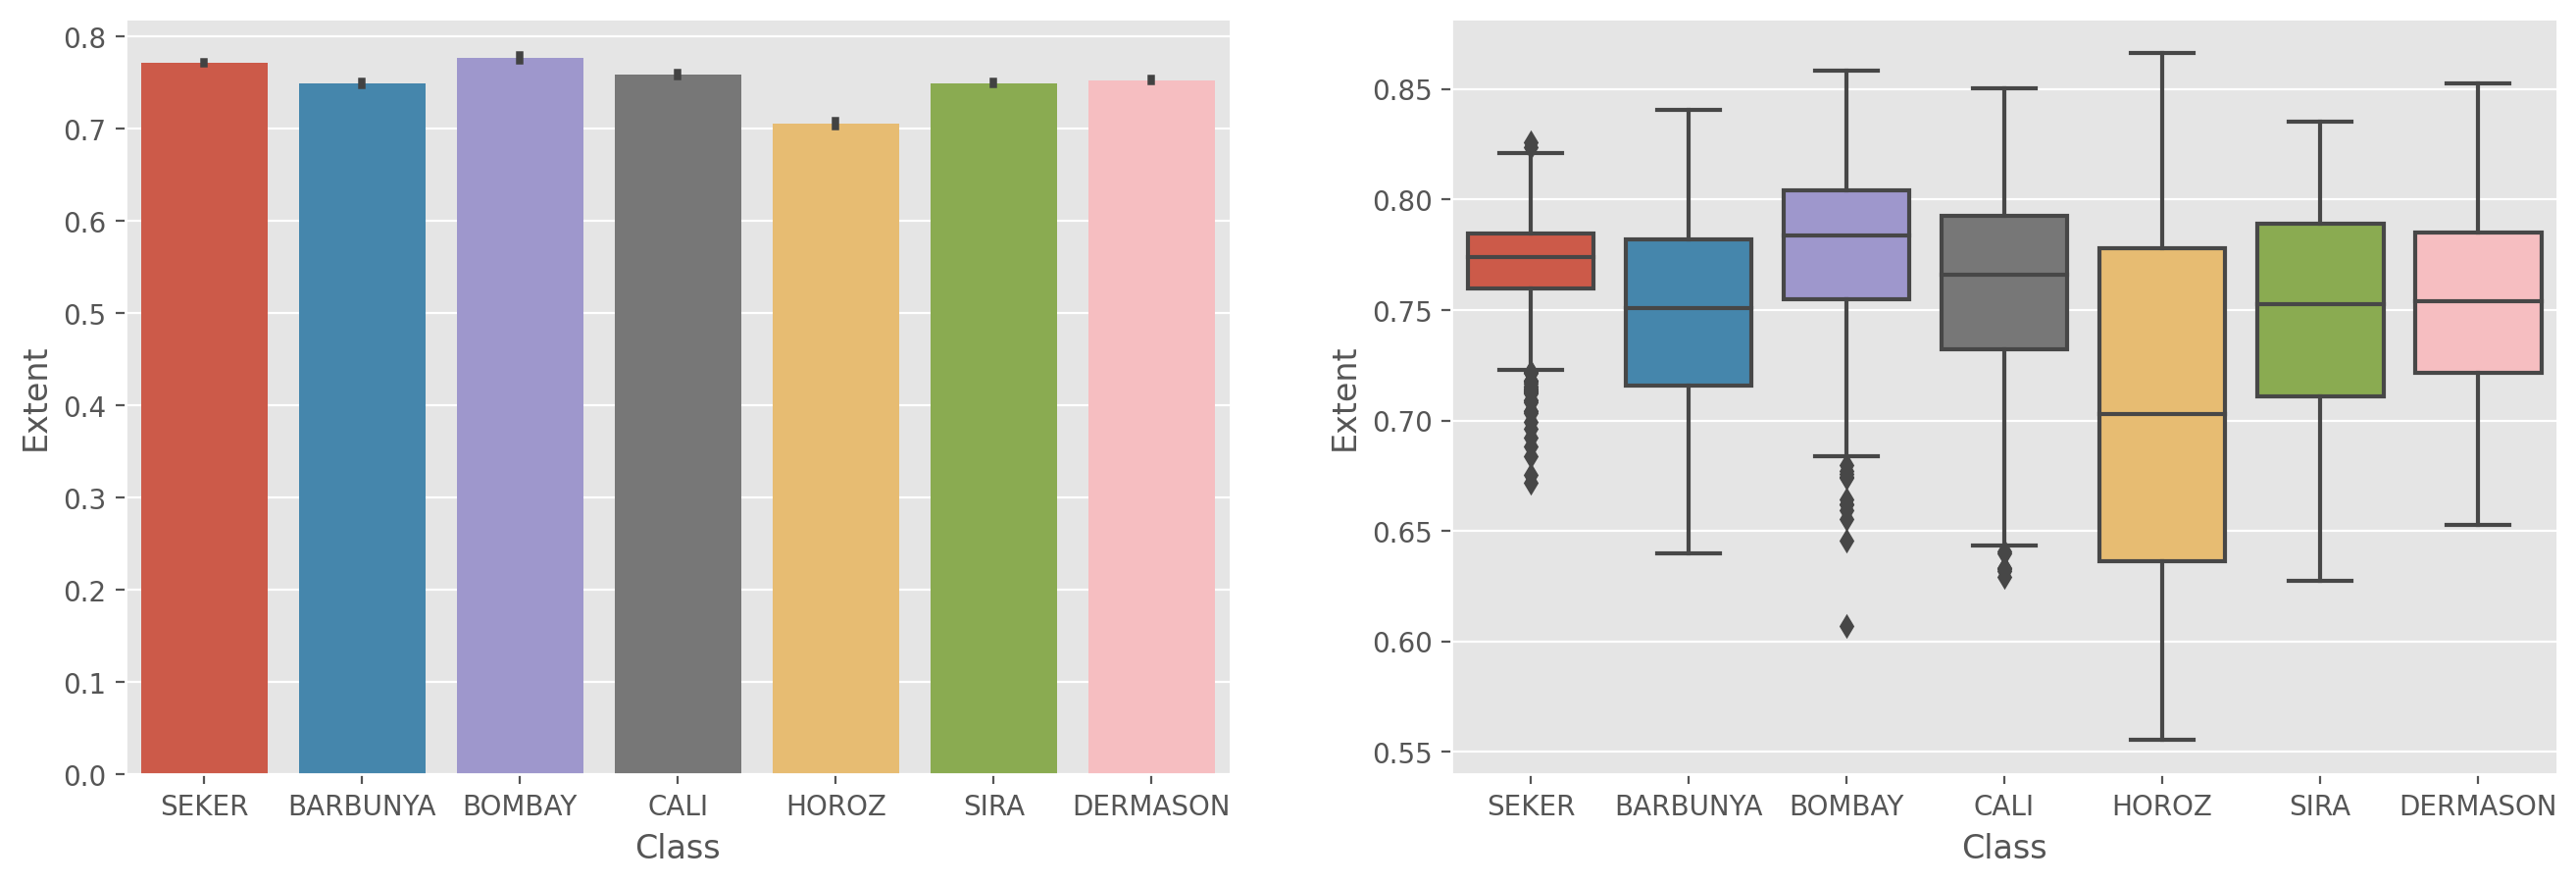

In [19]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Extent', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Extent', data = data)

<AxesSubplot:xlabel='Class', ylabel='Solidity'>

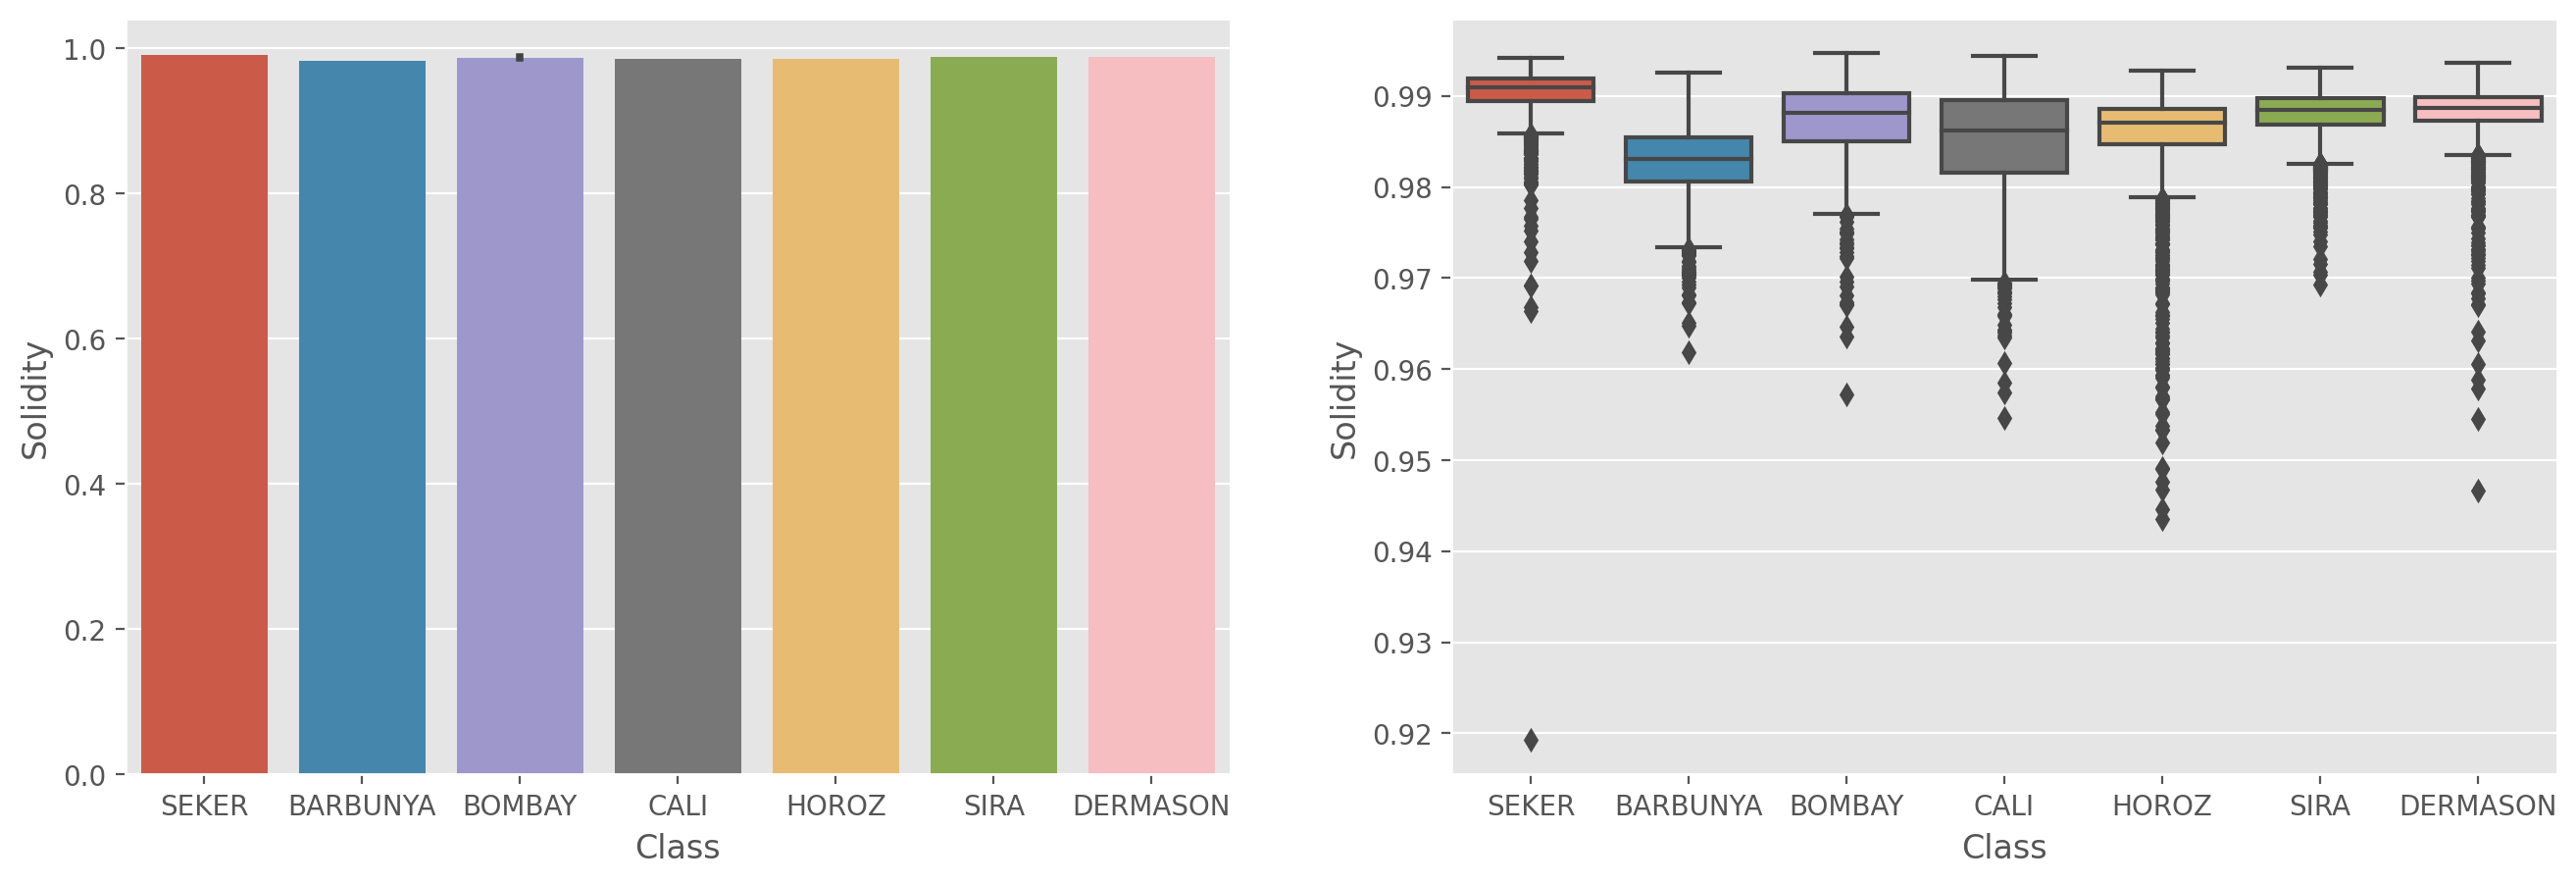

In [20]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Solidity', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Solidity', data = data)

<AxesSubplot:xlabel='Class', ylabel='roundness'>

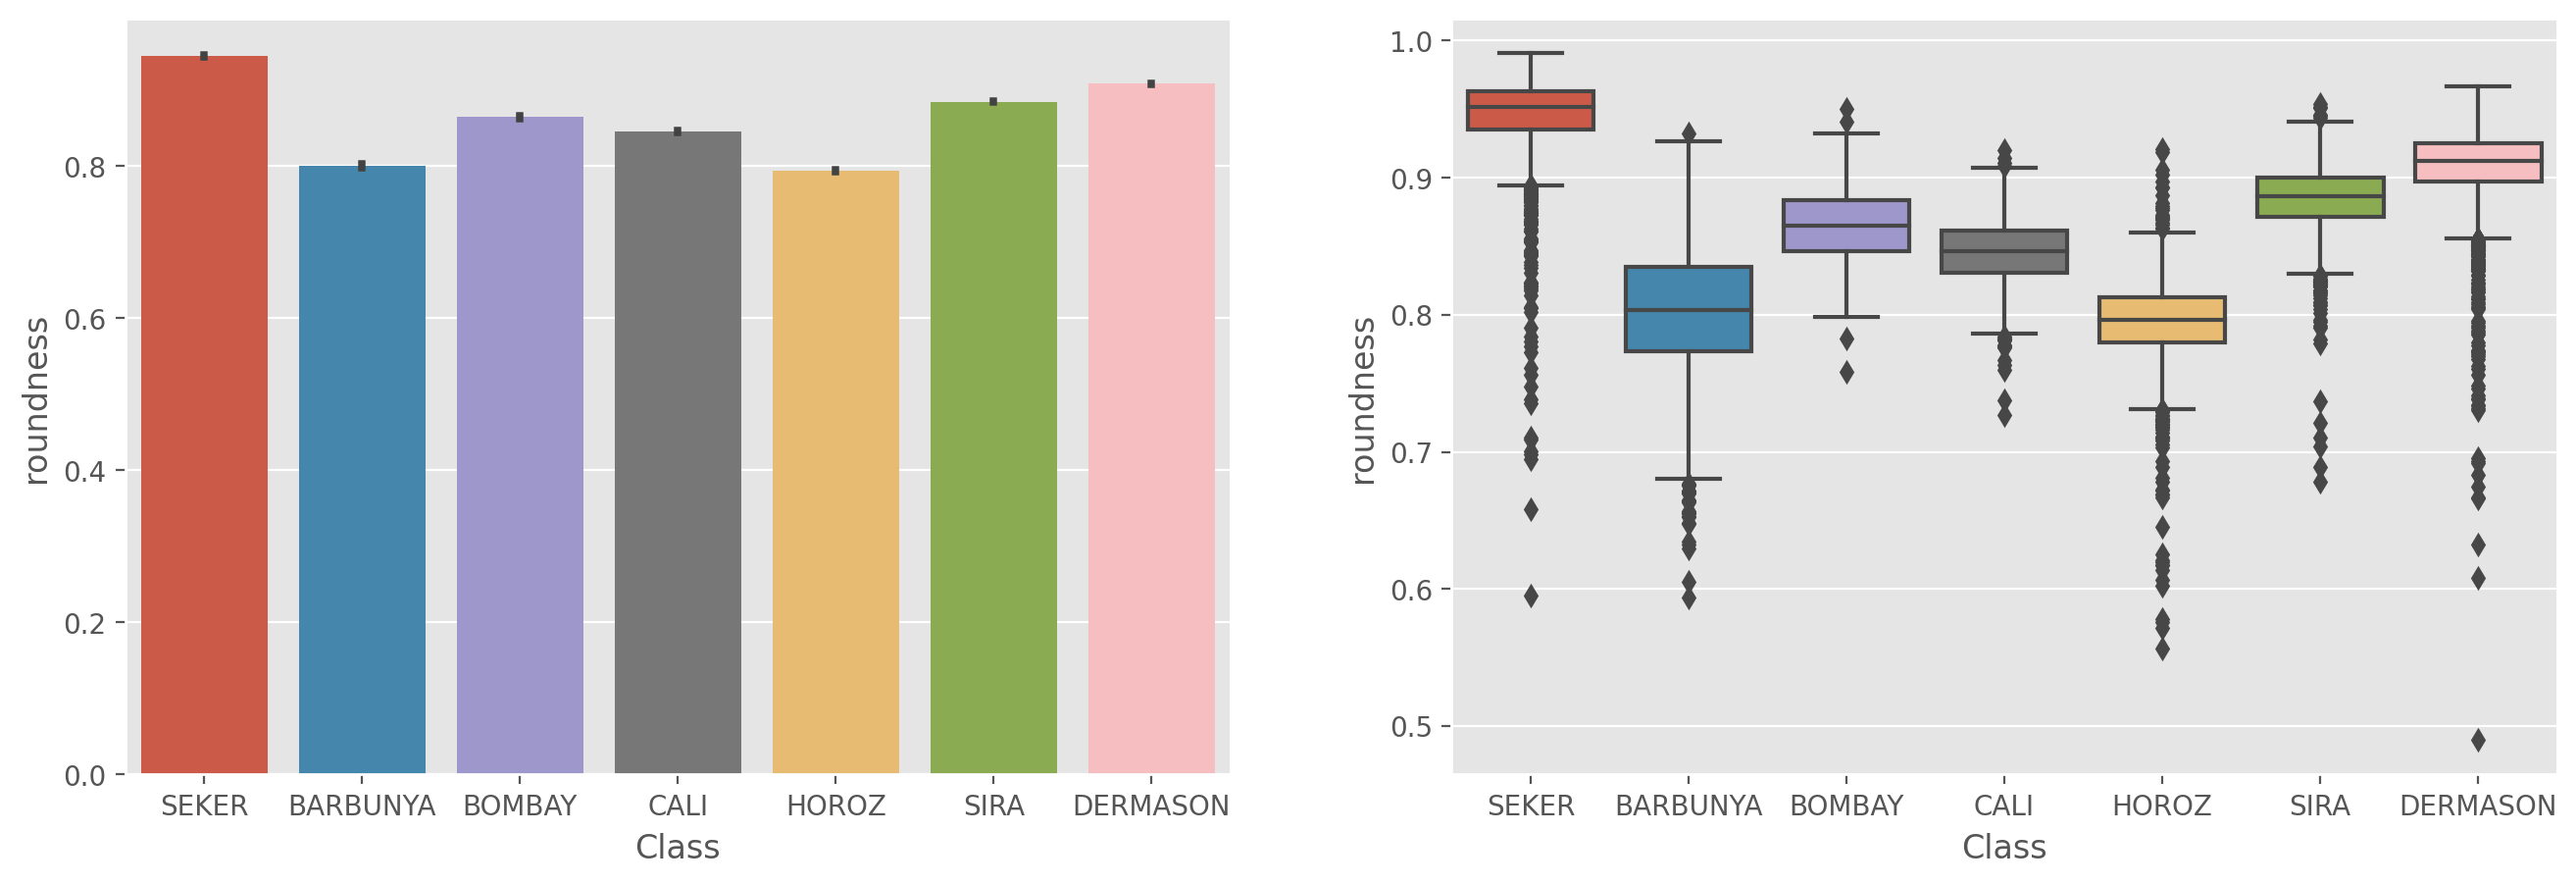

In [21]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'roundness', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'roundness', data = data)

<AxesSubplot:xlabel='Class', ylabel='Compactness'>

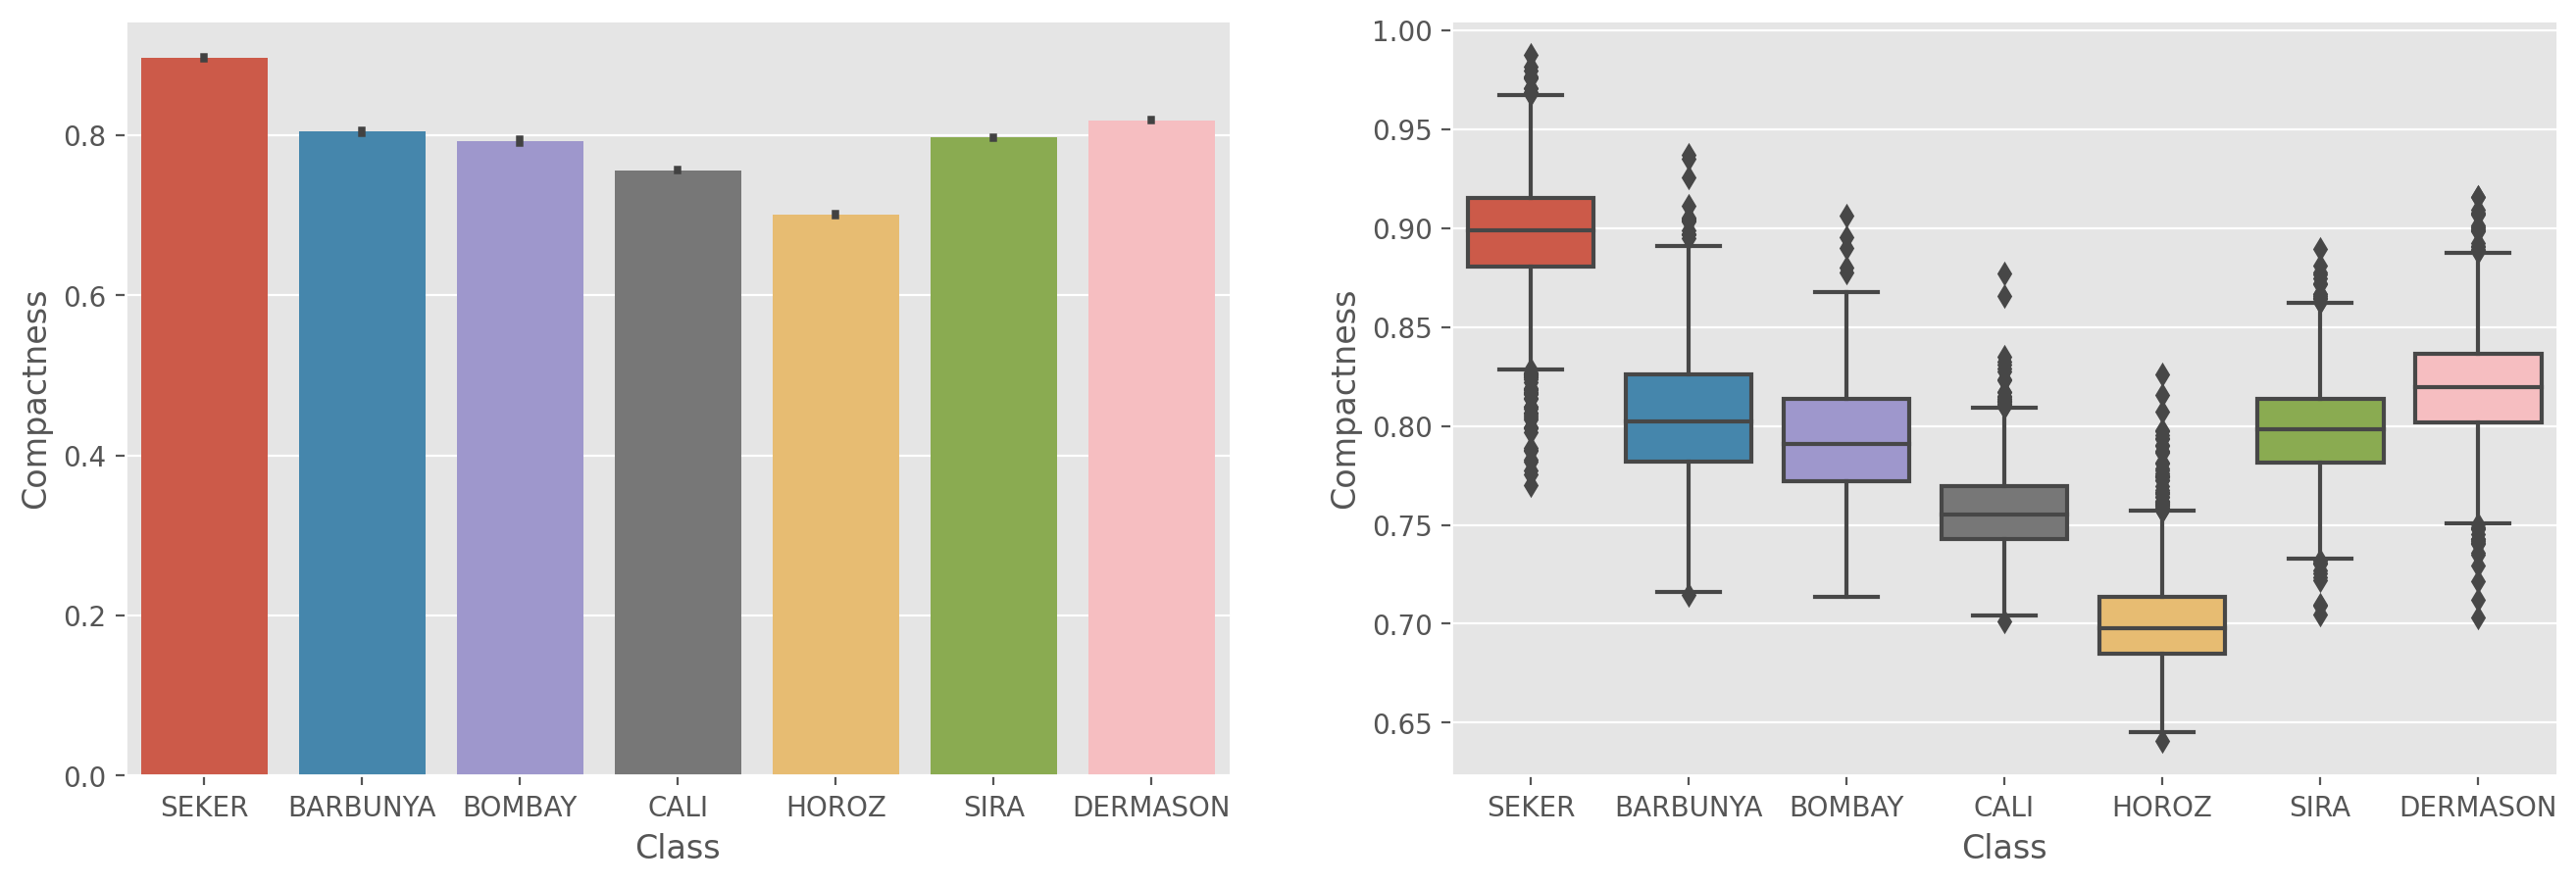

In [22]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'Compactness', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'Compactness', data = data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor1'>

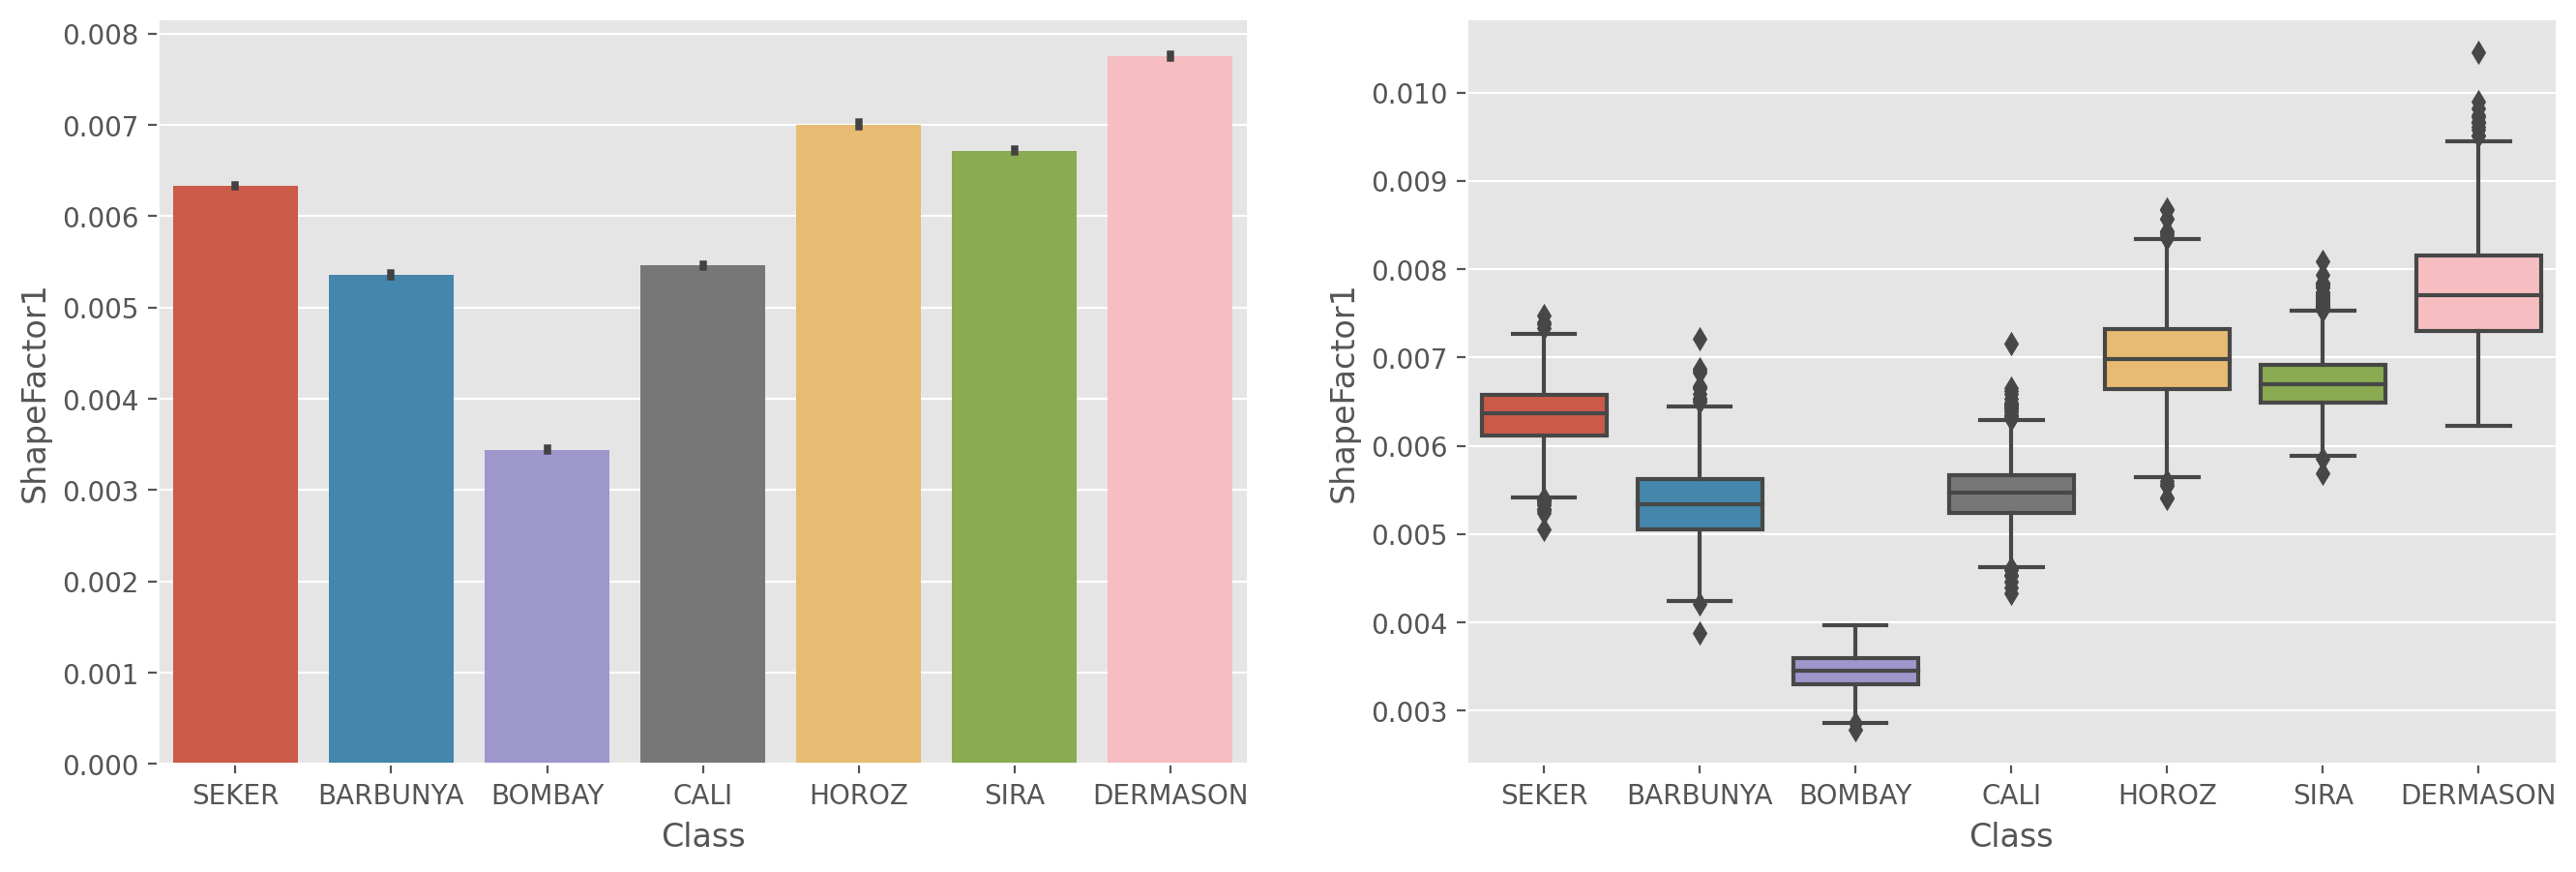

In [23]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'ShapeFactor1', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'ShapeFactor1', data = data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor2'>

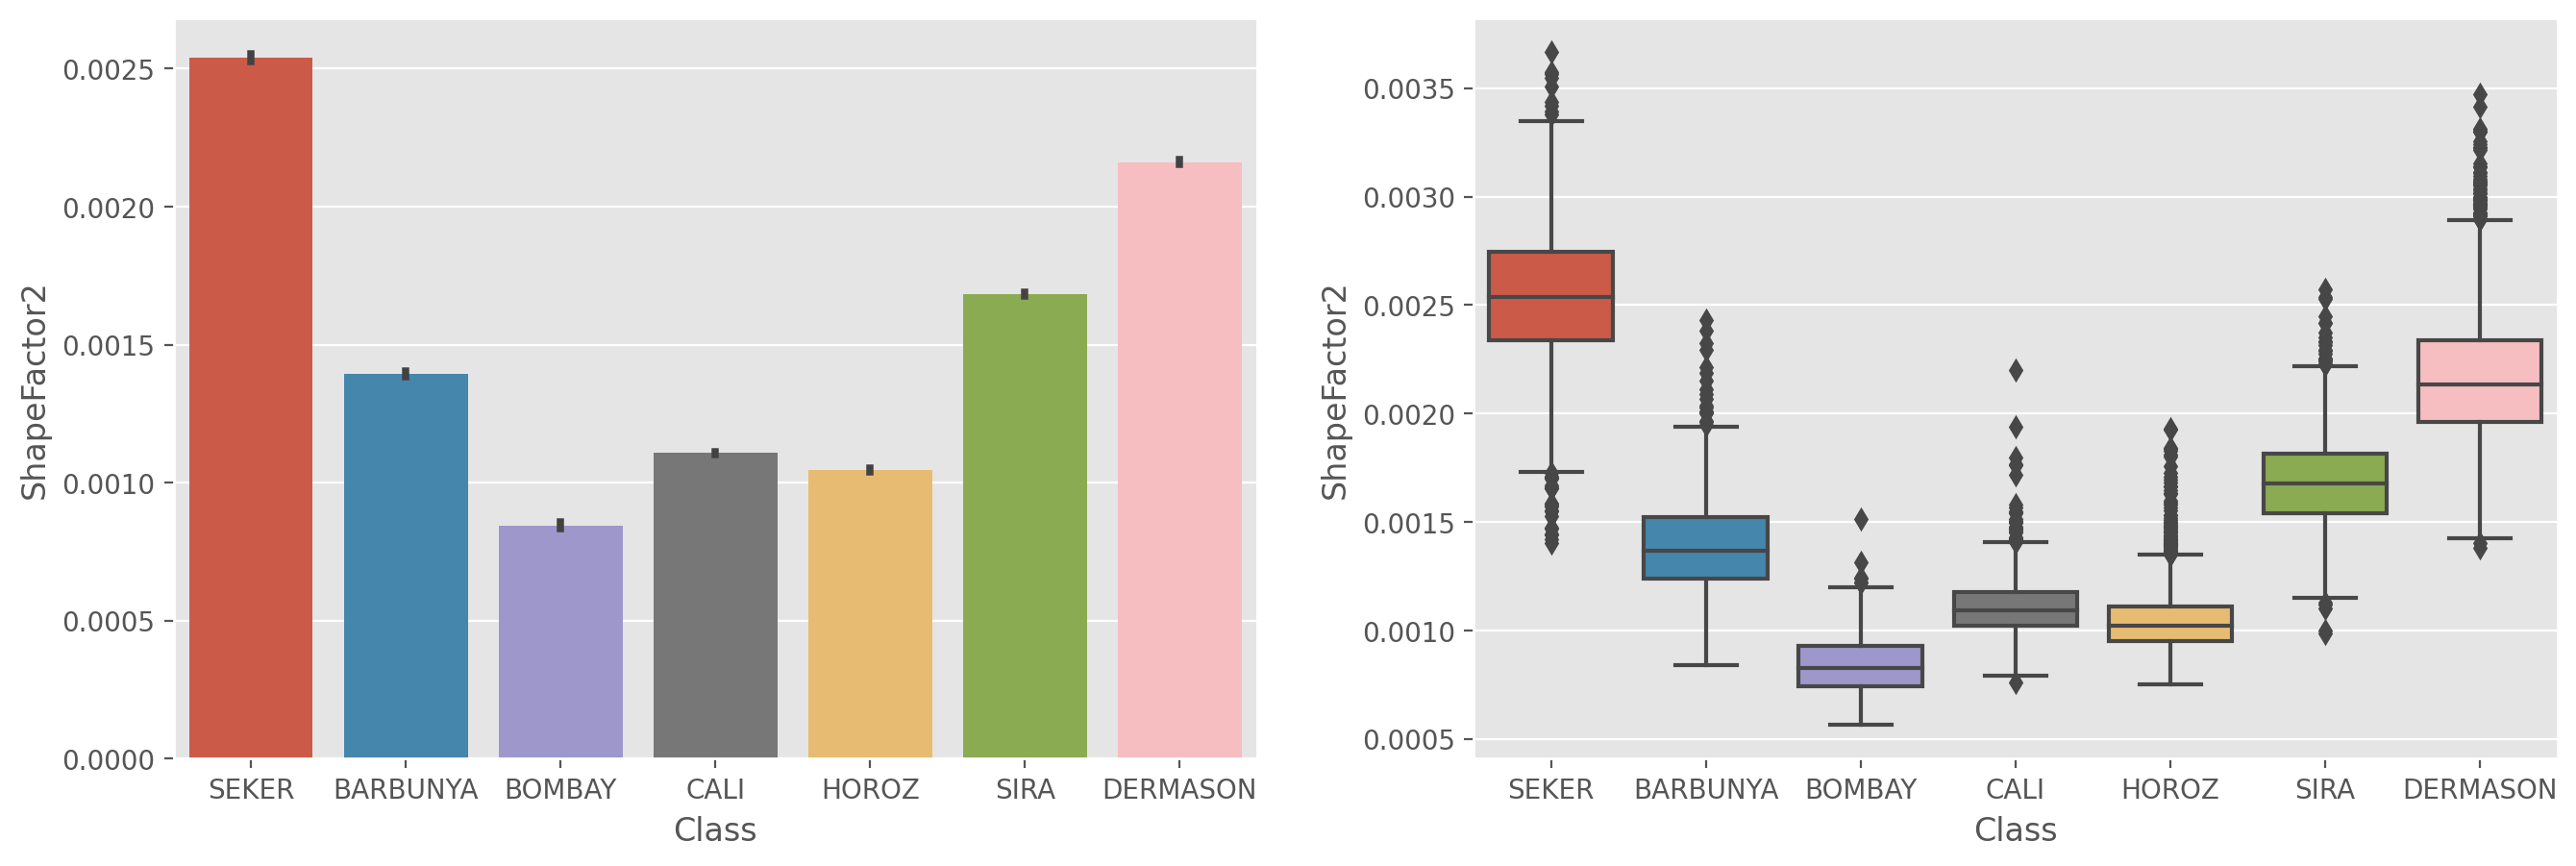

In [24]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'ShapeFactor2', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'ShapeFactor2', data = data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor3'>

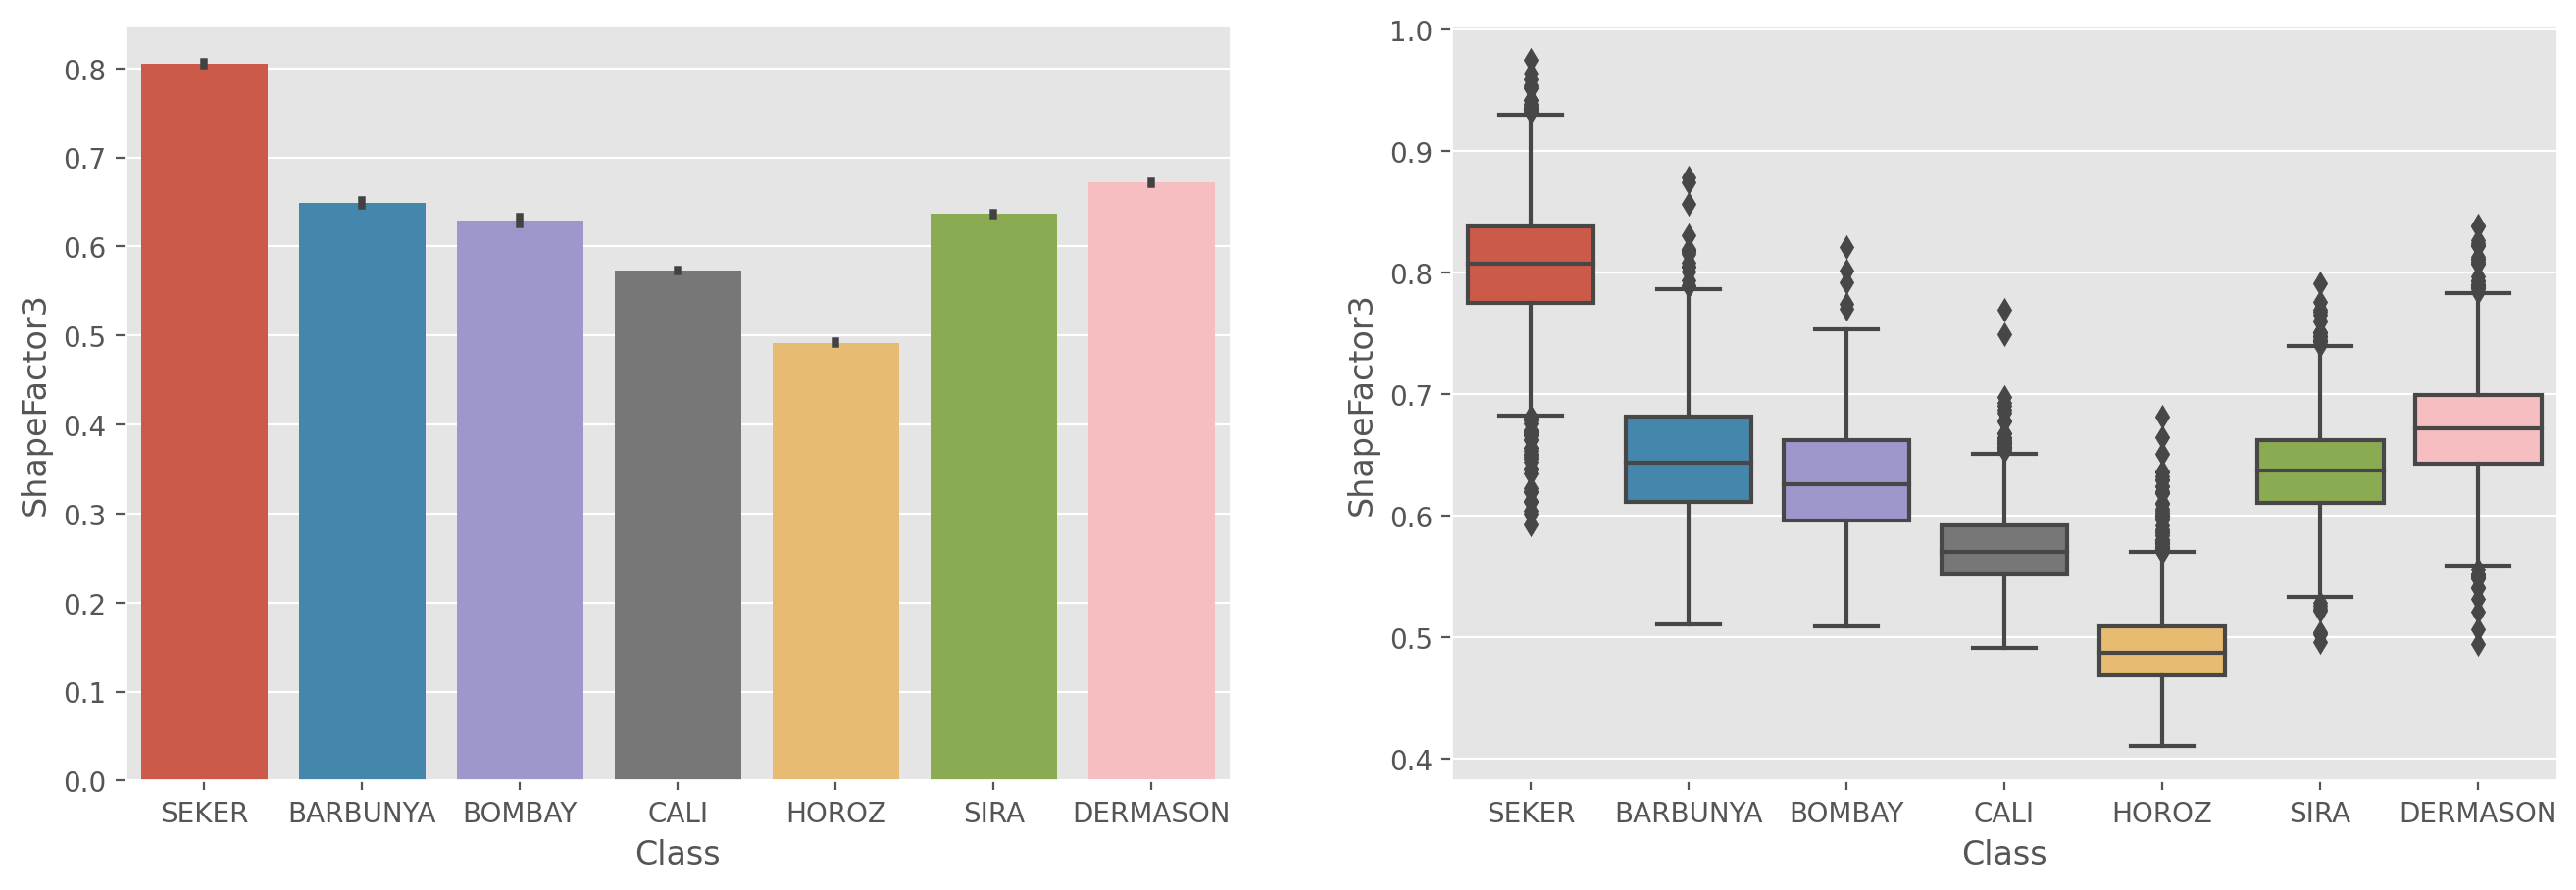

In [25]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'ShapeFactor3', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'ShapeFactor3', data = data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor4'>

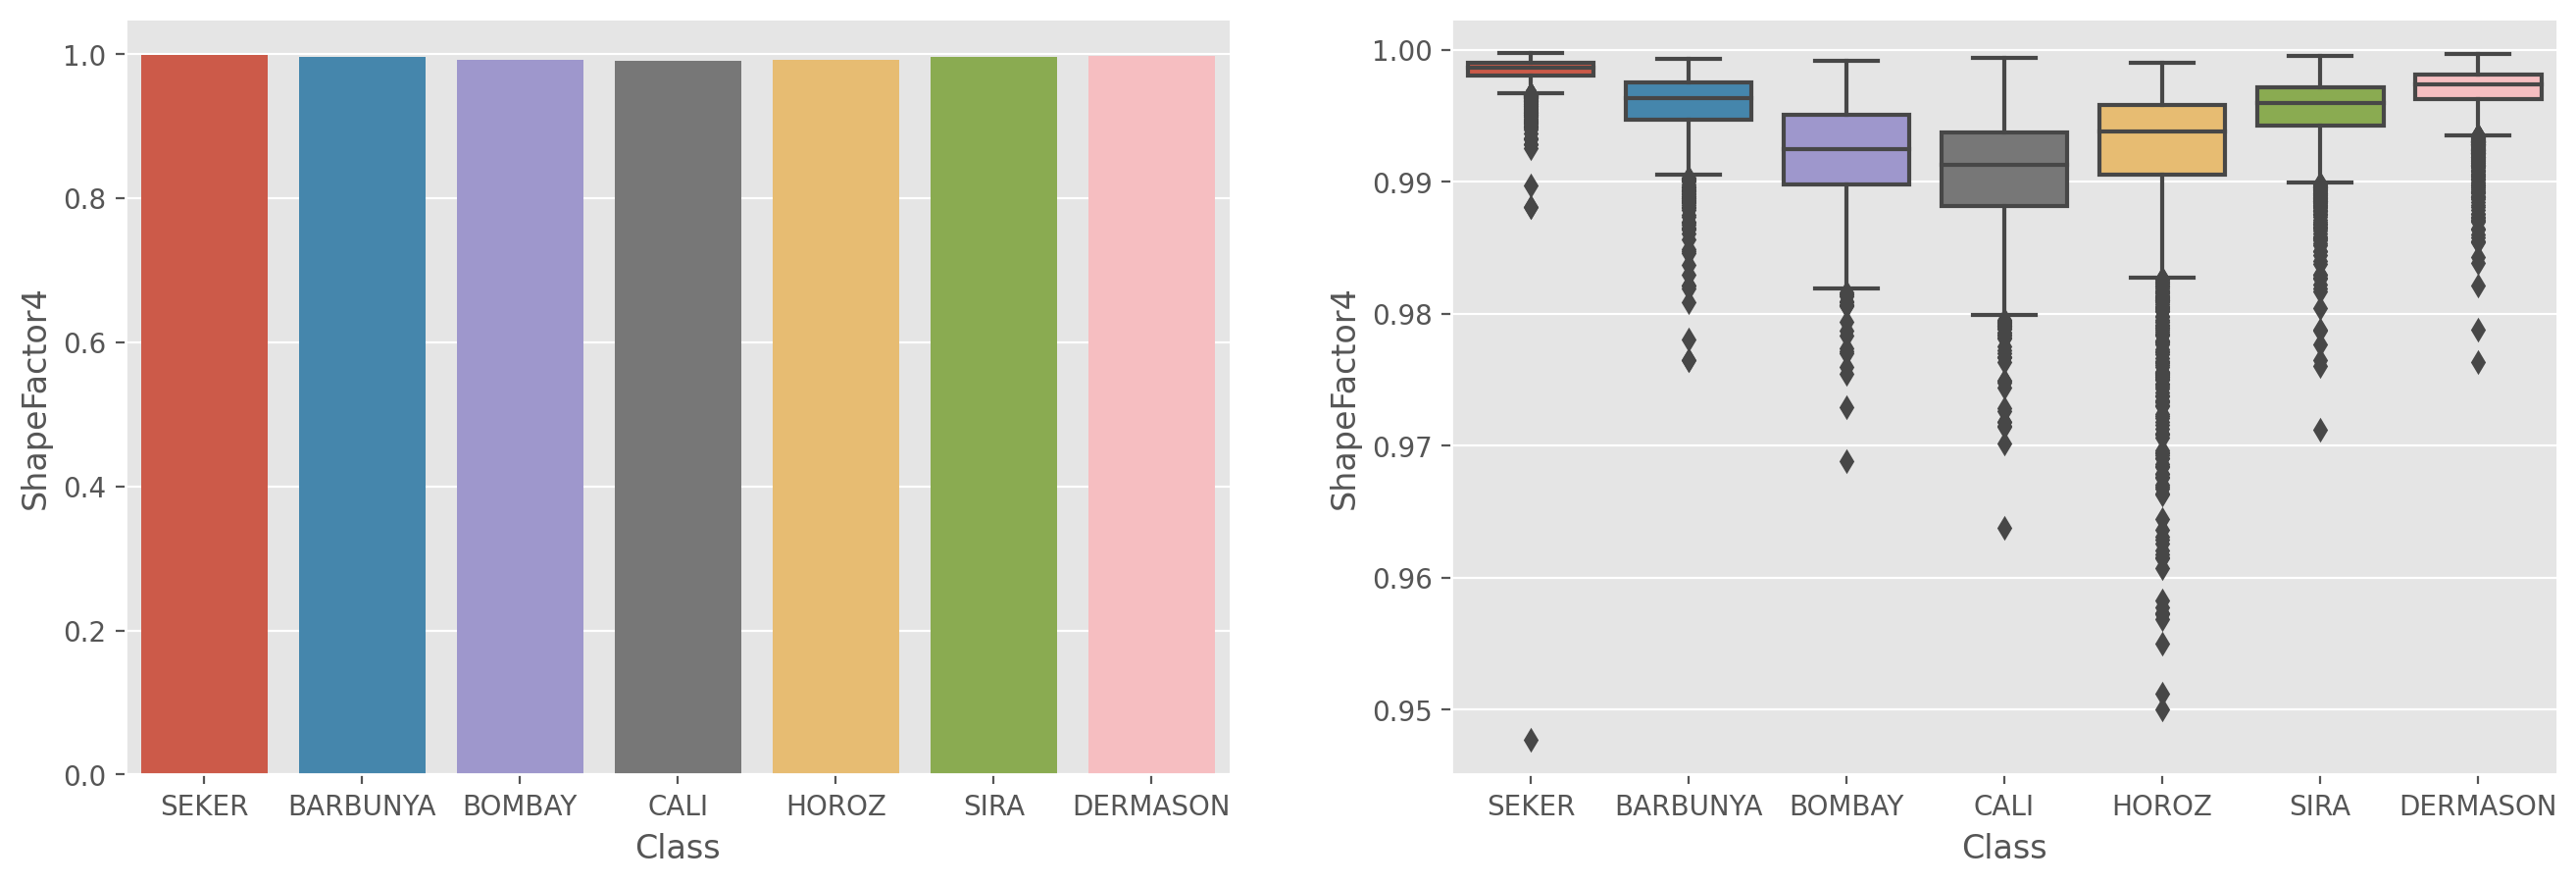

In [26]:
plt.figure(figsize = (16,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Class', 'ShapeFactor4', data = data)
plt.subplot(1,2,2)
sns.boxplot('Class', 'ShapeFactor4', data = data)

In [27]:
X = data.drop('Class', axis = 1)

In [28]:
Y = data[['Class']]

In [29]:
print('Independent feature set shape: ', X.shape)
print('Dependent feature shape      : ', Y.shape)

Independent feature set shape:  (13542, 16)
Dependent feature shape      :  (13542, 1)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [31]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (10833, 16)
Training labels shape :  (10833, 1)
Testing data shape    :  (2709, 16)
Testing labels shape  :  (2709, 1)


## Using KNN algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.8298716883596419
Testing Set Score  :  0.8006644518272426


In [34]:
acc_train = []
acc_test  = []

for k in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

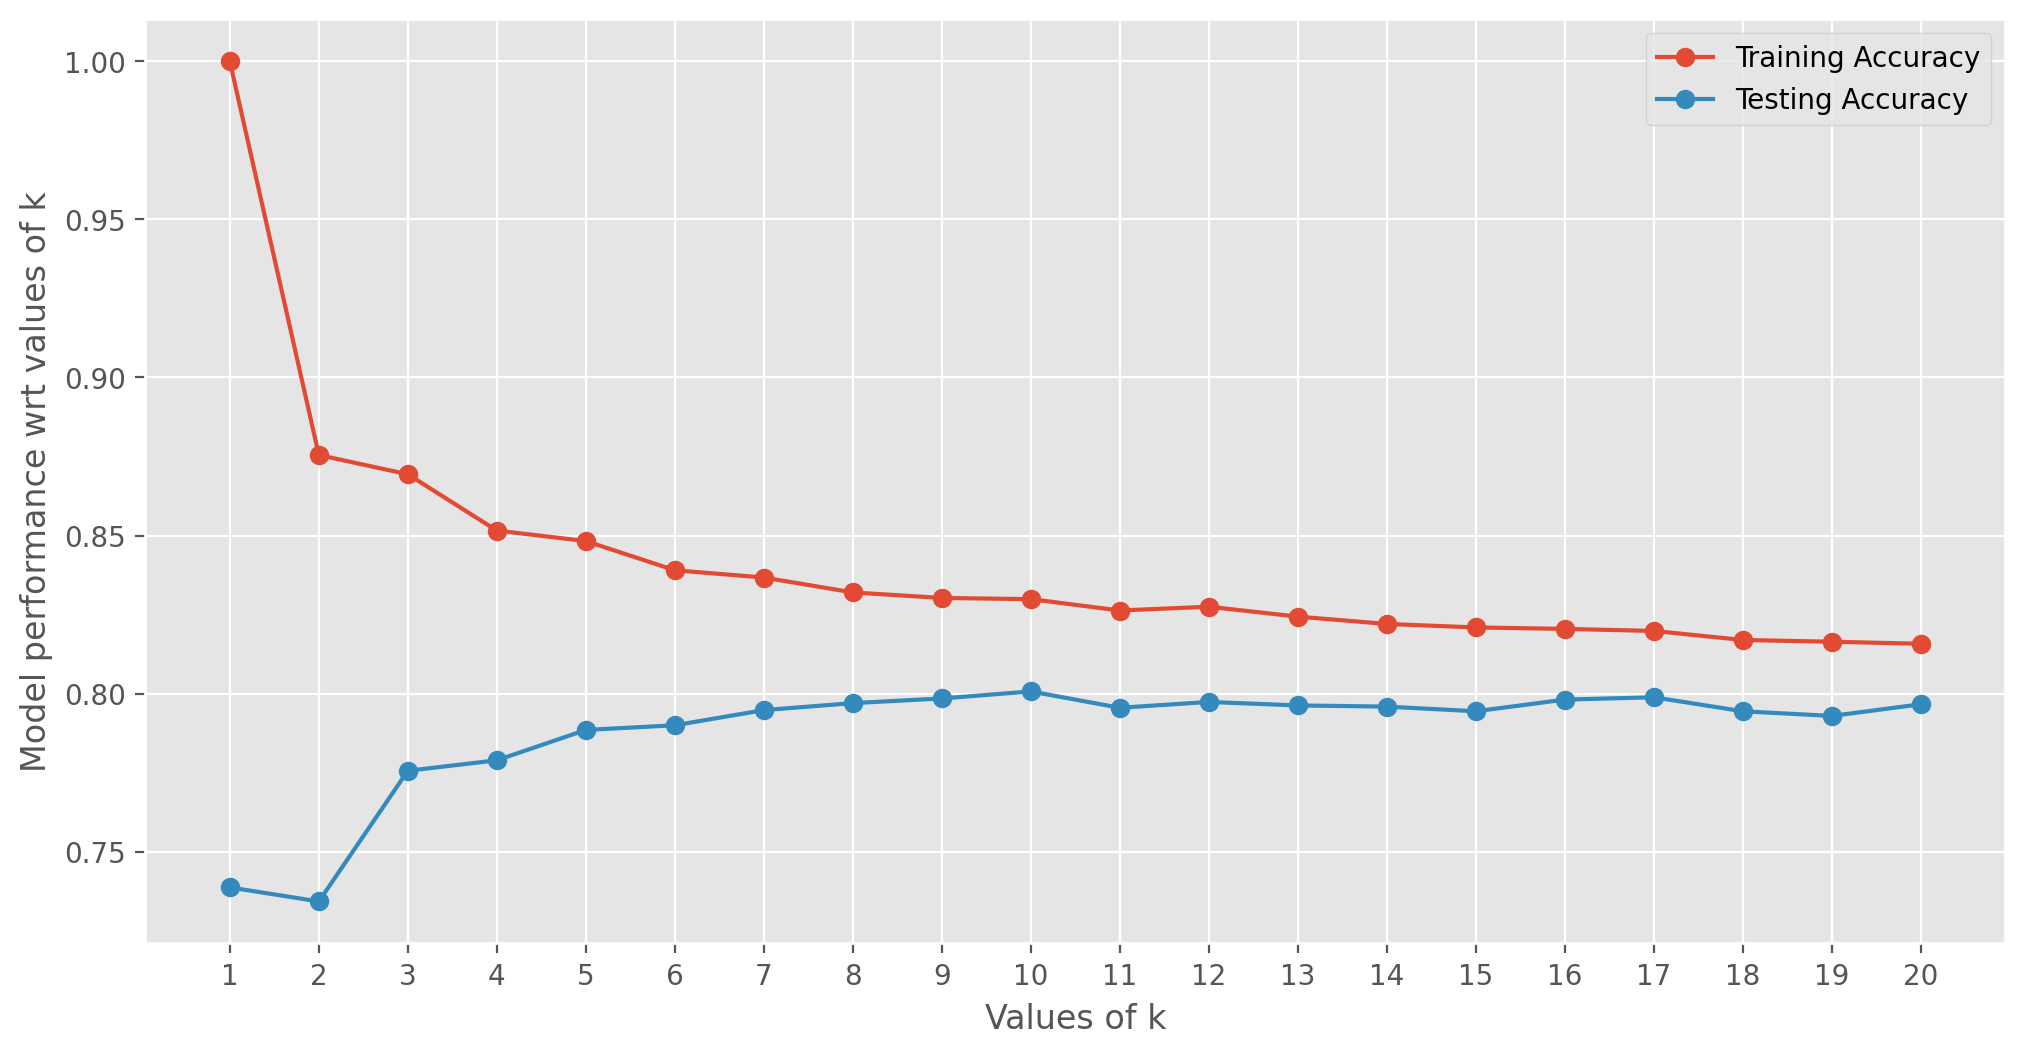

In [35]:
k = list(range(1,21))

plt.figure(figsize = (12,6), dpi = 200)
plt.plot(k, acc_train, '-o', label = 'Training Accuracy')
plt.plot(k, acc_test,  '-o', label = 'Testing Accuracy')

plt.xticks(k)
plt.xlabel('Values of k')
plt.ylabel('Model performance wrt values of k')
plt.legend()

## Using Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [37]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9268900581556355
Testing Set Accuracy  :  0.9010705057216685


## Using Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, max_depth = 8, max_features = 4)
classifier.fit(x_train, y_train)

print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.9387981168651343
Testing Set Score  :  0.9095607235142119
